In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from google.colab import drive
import os
from scipy.stats import linregress
import statistics

In [2]:
drive.mount('/content/drive', force_remount=True)

path = "/content/drive/MyDrive/Master Thesis/"
log_path = path + "Logs/"
plot_path = path + "Plots/"

Mounted at /content/drive


In [3]:
splitter = "; "
splitter2 = ": "

# set plotting font size
plt.rcParams.update({'font.size': 12})

def read_log(log_filename):
  with open(log_filename, "r") as f:
    content = f.readlines()
  objects = []
  for line in content:
    line = line.replace("\n", "").split(splitter)
    assert(len(line) == 4)
    mapper = {}
    for elm in line:
      elm = elm.split(splitter2)
      assert(len(elm) == 2)
      key, value = elm[0], elm[1]
      mapper[key] = value
    objects.append(mapper)
  return objects

def log_data(log_filename):
  log = read_log(log_filename)
  data = {}
  for entry in log:
    model = entry["model"]
    k = entry["k"]
    test_PK_cosine = entry["test P@K cosine"]
    test_PK_euclidian = entry["test P@K euclidian"]

    if model not in data:
      data[model] = {}
    if k not in data[model]:
      data[model][k] = {
          "test_PK_cosine": {},
          "test_PK_euclidian": {}
      }

    data[model][k]["test_PK_cosine"] = test_PK_cosine
    data[model][k]["test_PK_euclidian"] = test_PK_euclidian
  return data

def plot_file(log_filename, plot_baseline=False, plot_cosine=True, plot_euclidian=False, collector=None, collection=None):
  if "procrustes" in log_filename:
    experiment = "Procrustes"
  elif "ridge" in log_filename:
    experiment = "Ridge"
  else:
    raise Exception(f"Did not expect this...{log_filename}")

  assert(not (plot_cosine and plot_euclidian))
  if plot_cosine:
    metric = "test_PK_cosine"
  elif plot_euclidian:
    metric = "test_PK_euclidian"
  else:
    raise Exception("Did not expect this...")

  bert_models = ["bert-mini", "bert-small", "bert-medium", "bert-base", "bert-large"]
  t5_models = ["t5-small", "t5-base", "t5-large", "t5-3b"]
  opt_models = ["opt-125m", "opt-350m", "opt-1.3b", "opt-2.7b", "opt-6.7b"]
  gpt_models = ['gpt2','gpt2-medium','gpt2-large', "gpt2-xl", "ada-002"]
  #XLNet_models = ["XLNet-base", "XLNet-large"]
  titles = ["BERT", "T5", "OPT", "GPT"]
  #all_models = [bert_models, t5_models, opt_models, gpt_models, XLNet_models]
  all_models = [bert_models, t5_models, opt_models, gpt_models]
  ks = [1,10,20,50]

  n_cols = 4
  n_rows = 1
  row_counter = 1
  col_counter = 0
  data = log_data(log_filename)
  #color = "black"
  #line_styles = ["dotted", "solid", "dashed", "dashdot"]
  colors = ["b", "g", "r", "k"] # blue (k=1), green (k=10), red (k=20), black (k=50)
  if "biggraph" in log_filename:
    reference_space_type = "Biggraph"
  elif "transe" in log_filename:
    reference_space_type = "TransE"
  elif "complex" in log_filename:
    reference_space_type = "Complex"
  else:
    raise Exception("DId not expect this")
  if "20K_1_to_1_synsets" in log_filename:
    data_type = "Common english words, 1 meaning"
  elif "20K_2_to_3_synsets" in log_filename:
    data_type = "Common english words, 2 to 3 meanings"
  elif "20K_4_to_infinity_synsets" in log_filename:
    data_type = "Common english words, > 4 meanings"
  elif "20K" in log_filename:
    data_type = "Common english words"
  elif "places" in log_filename:
    data_type = "English places"
  elif "names" in log_filename:
    data_type = "English names"
  else:
    raise Exception("Did not expect this")

  fig, axs = plt.subplots(n_rows, n_cols, figsize=(30,6))

  for ax in axs:
      ax.grid()
      ax.set_ylabel("Average P@k")

  for models, title in zip(all_models, titles):
    models_plotted = []
    for i, k in enumerate(ks):
      row = []
      row_baseline = []
      for model in models:
        if model in data:
          row.append(float(data[model][str(k)][metric]))
          if model not in models_plotted:
            models_plotted.append(model)
      if collector and collector(filename, reference_space_type, data_type, model):
        collection.append((experiment, reference_space_type, data_type, model, k, row, colors[i], title, models_plotted))
      axs[col_counter].plot(row, c=colors[i], linestyle="solid") #, label=f"K: {k}")
    #axs[col_counter].legend(loc="upper left")
    axs[col_counter].set_xticks(np.arange(len(models_plotted)), models_plotted)
    #axs[col_counter].set_title(f"{title} (Projection: {experiment}, reference space: {reference_space_type}, data: {data_type})", fontsize = 12)
    axs[col_counter].set_title(f"{title}", fontsize = 14)
    col_counter += 1
    if col_counter == n_cols:
      col_counter = 0
      row_counter += 1
  image_filename = log_filename.replace(log_path, "").replace("log_", "").replace(".txt", ".png")
  plt.savefig(plot_path + image_filename)
  plt.show()

#Plotting data

Data log_ridge_transe_names.txt


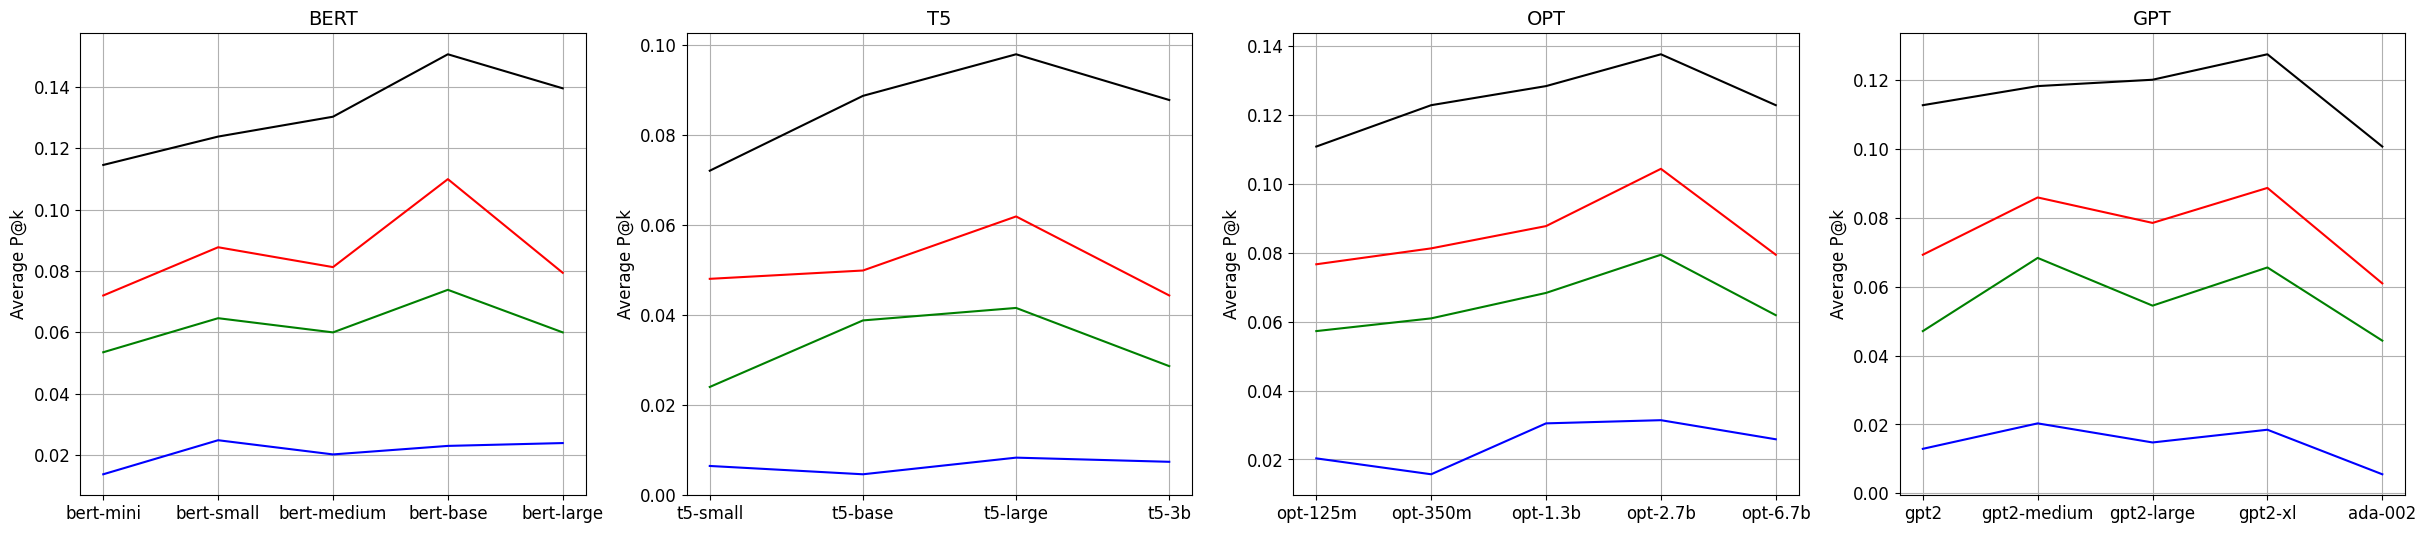

Data log_ridge_transe_20K.txt


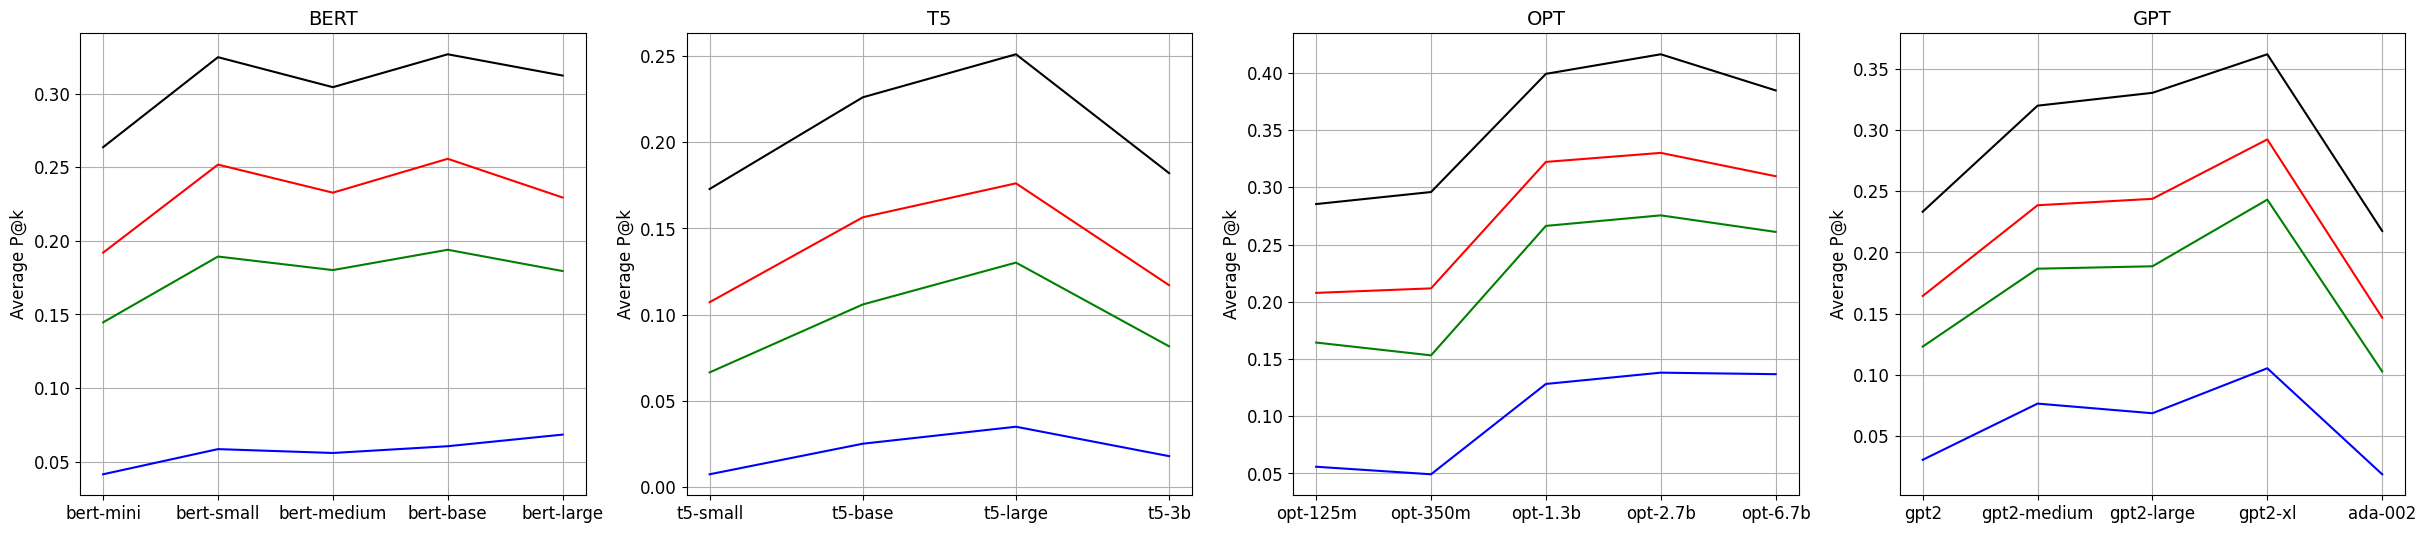

Data log_ridge_biggraph_20K.txt


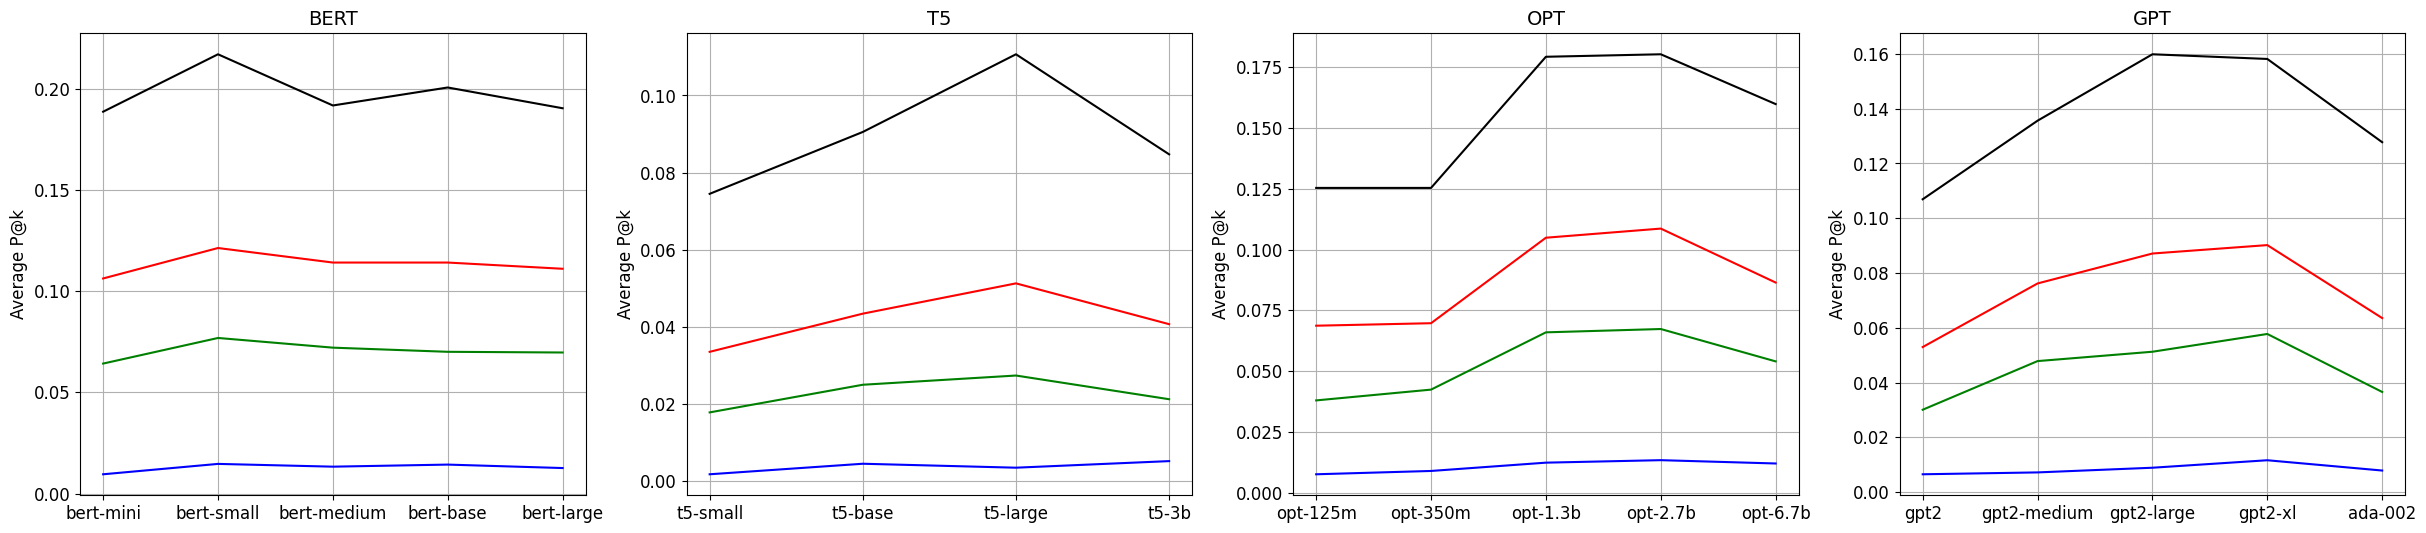

Data log_ridge_complex_names.txt


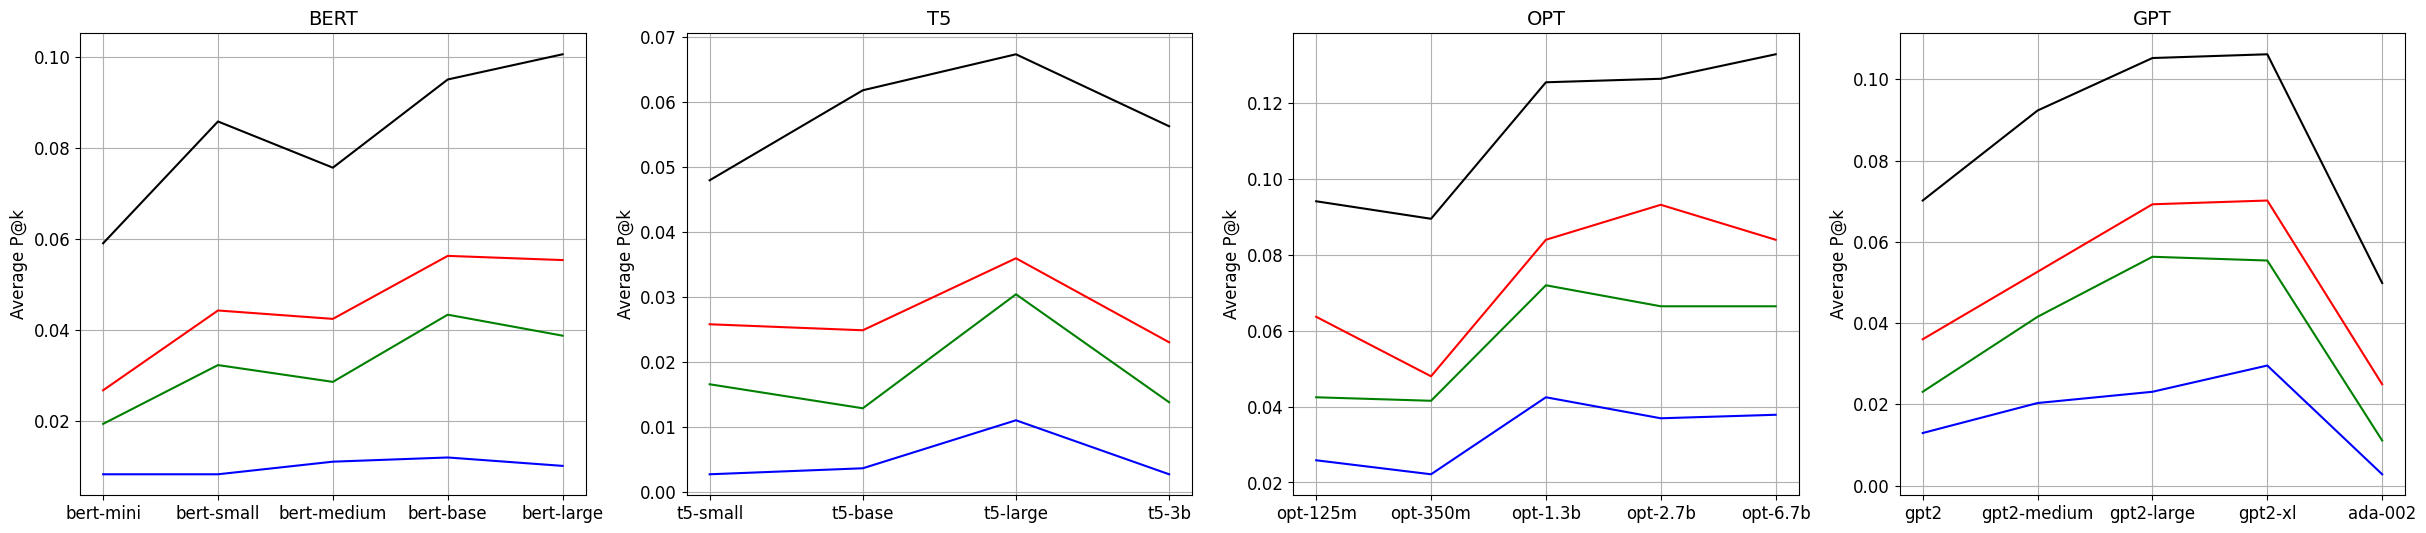

Data log_ridge_biggraph_places.txt


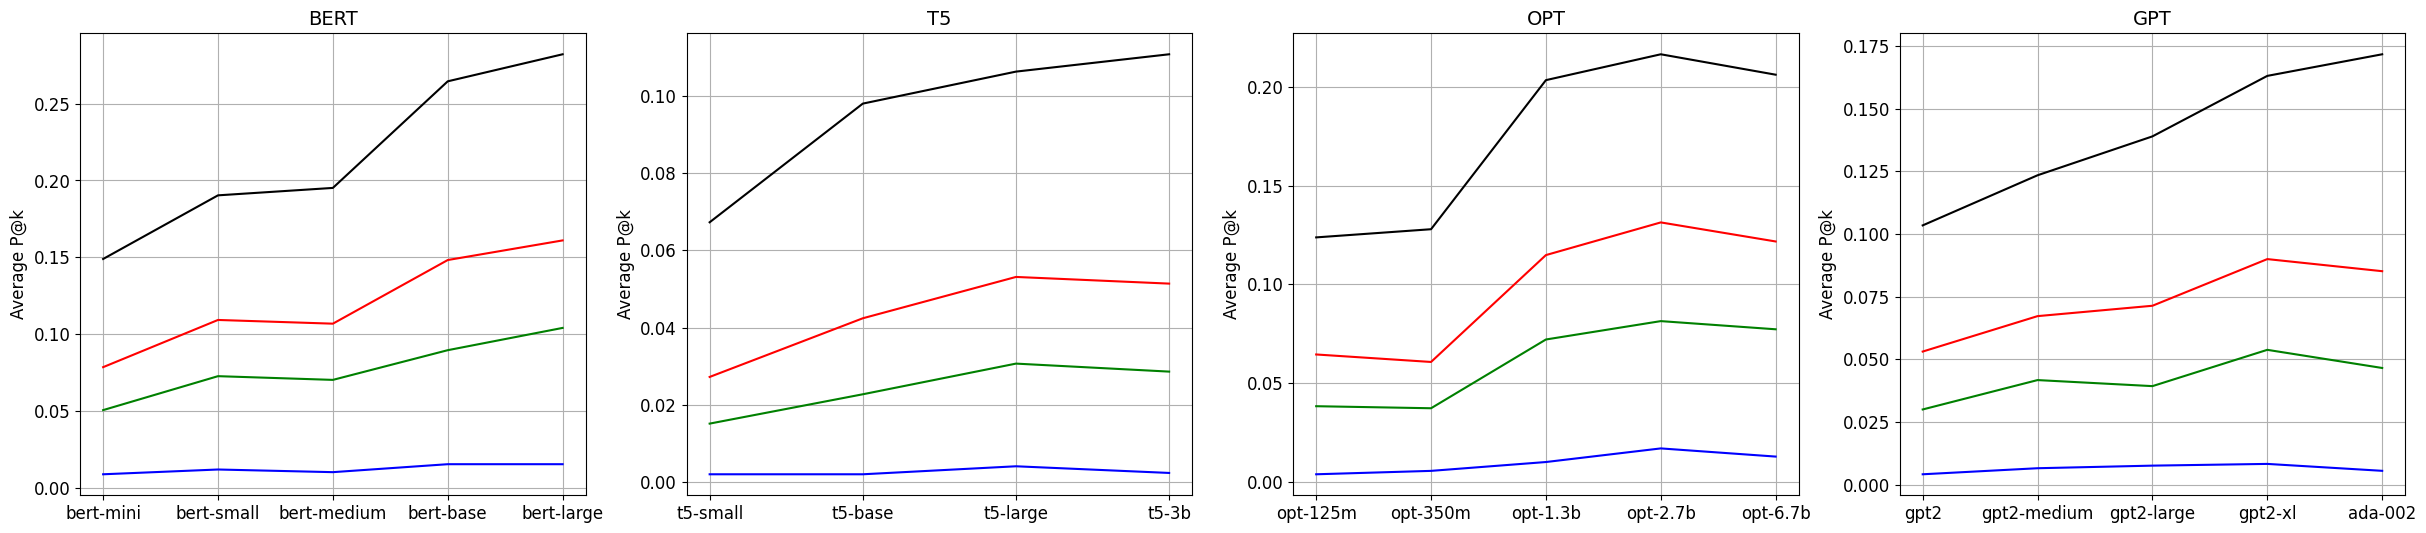

Data log_ridge_complex_20K.txt


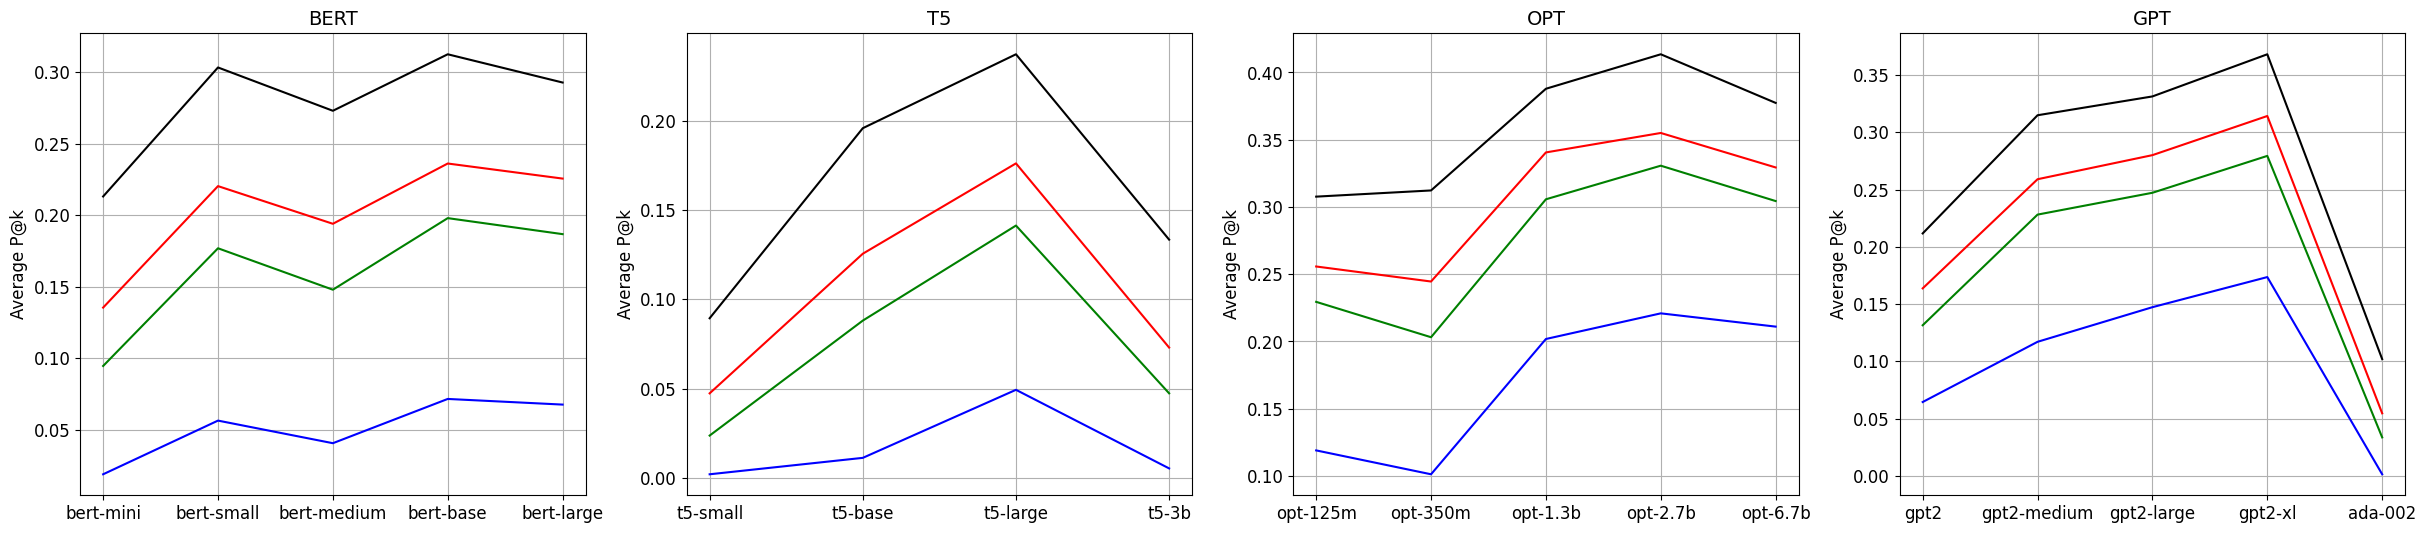

Data log_ridge_biggraph_names.txt


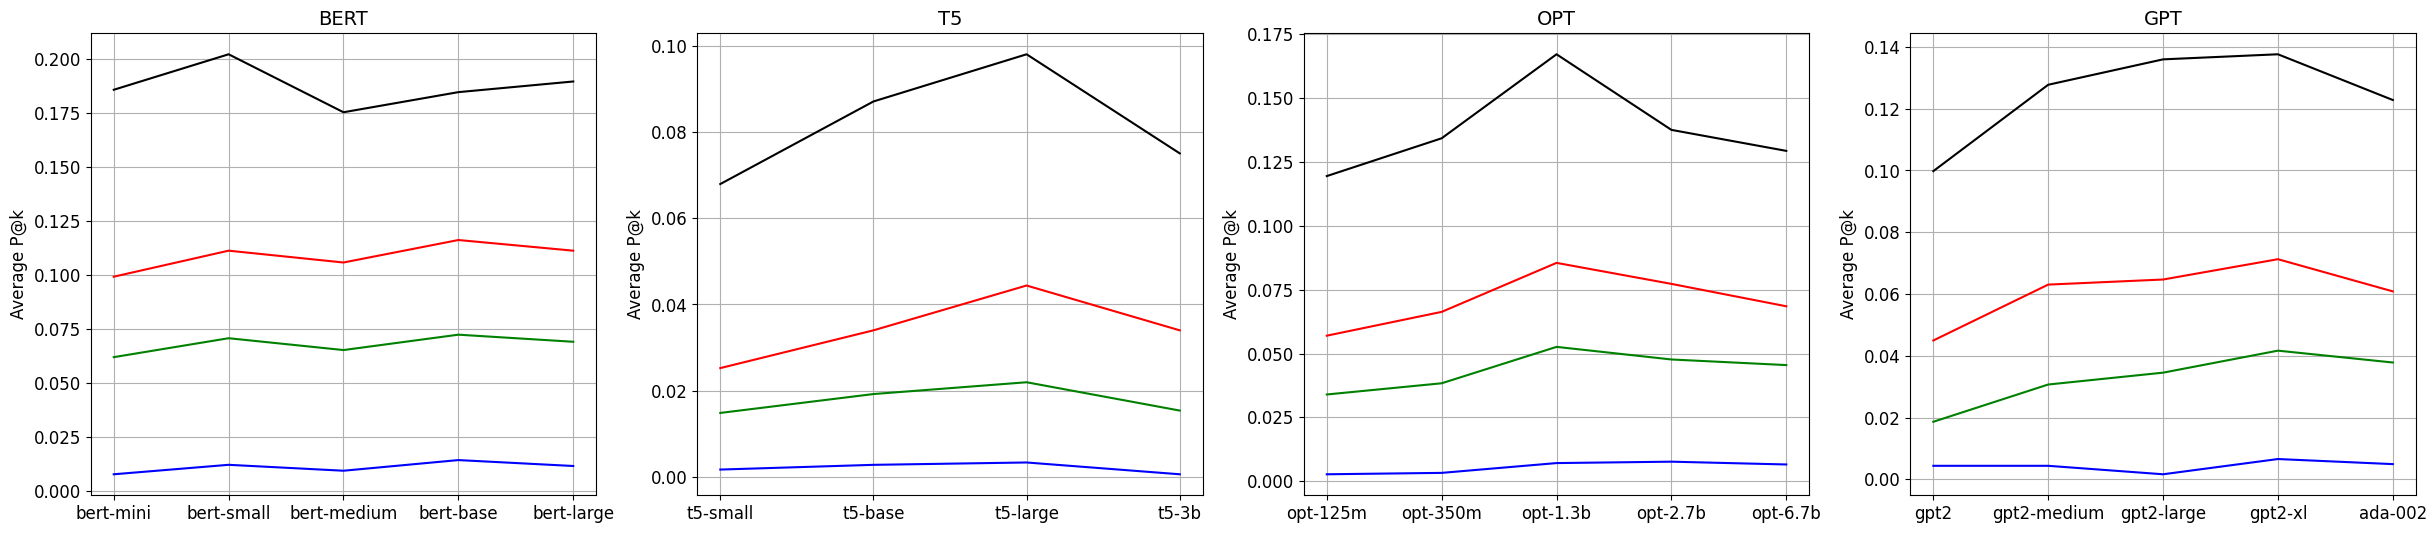

Data log_ridge_biggraph_20K_2_to_3_synsets.txt


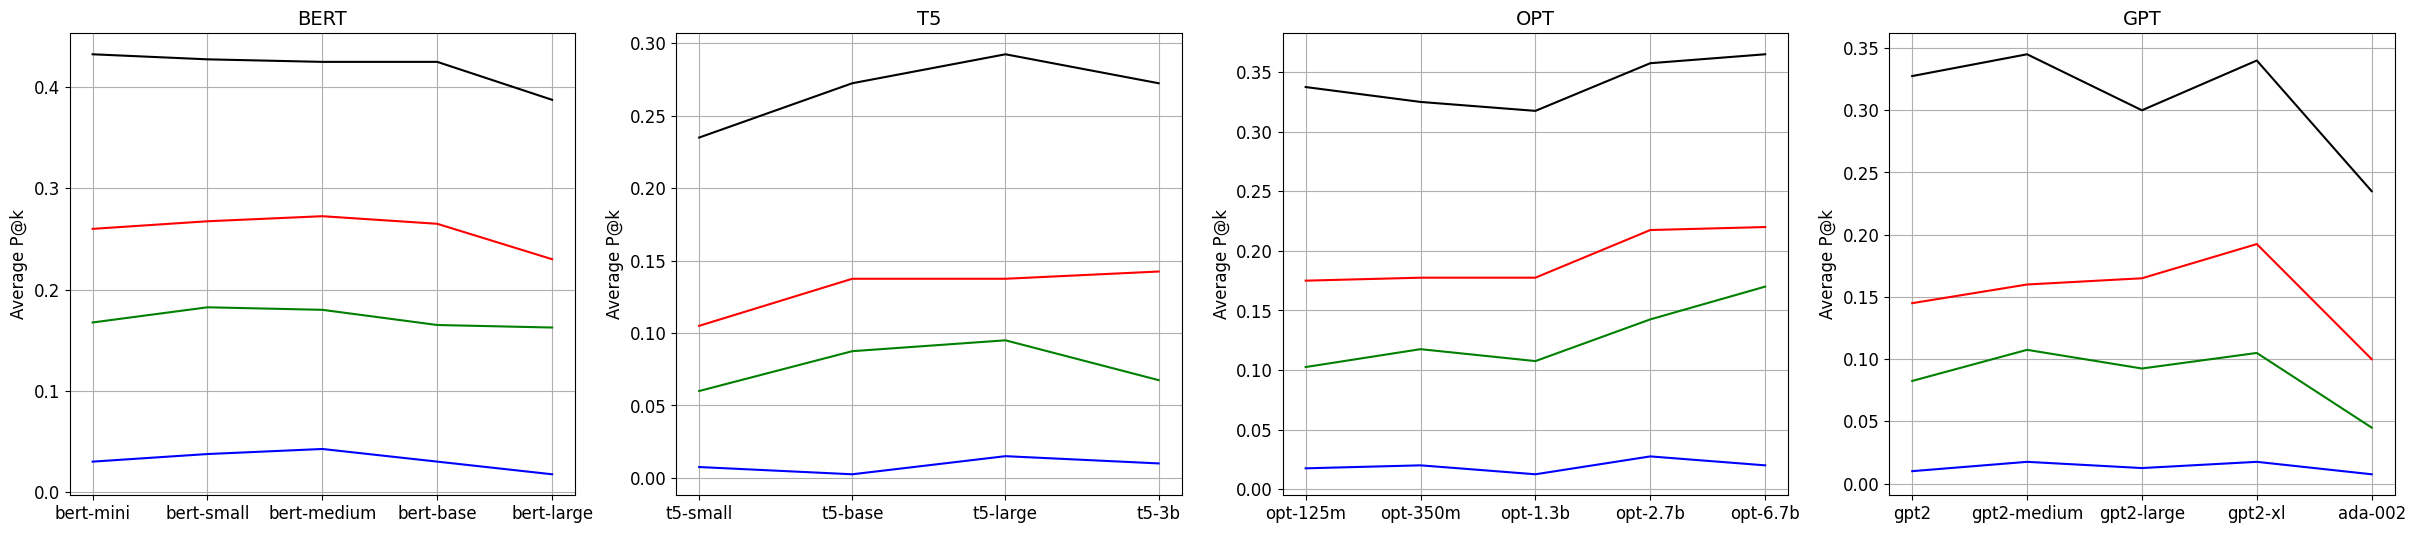

Data log_ridge_biggraph_20K_4_to_infinity_synsets.txt


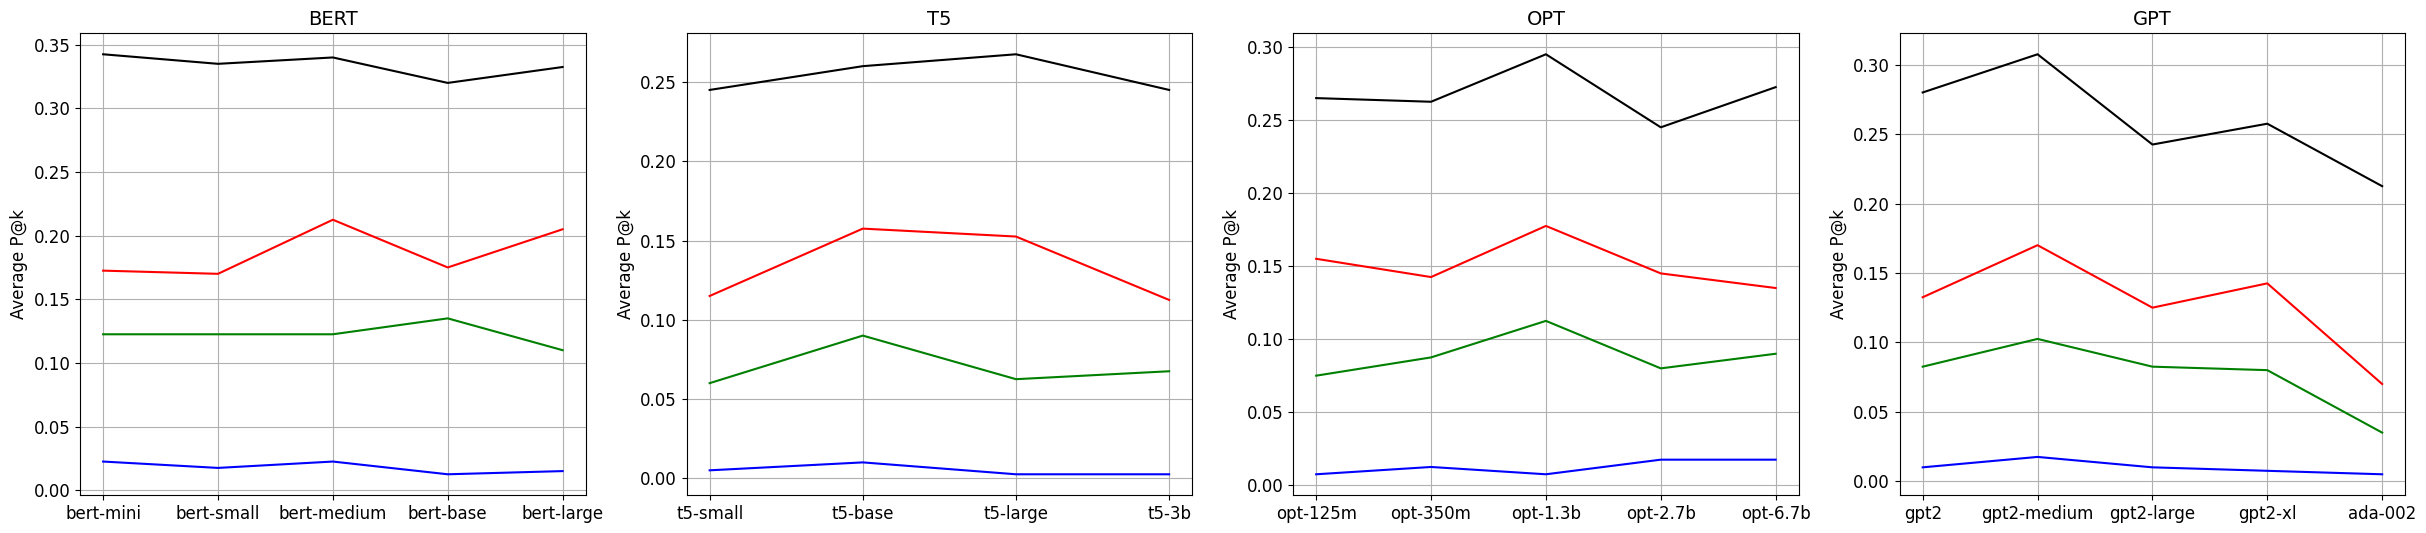

Data log_ridge_complex_places.txt


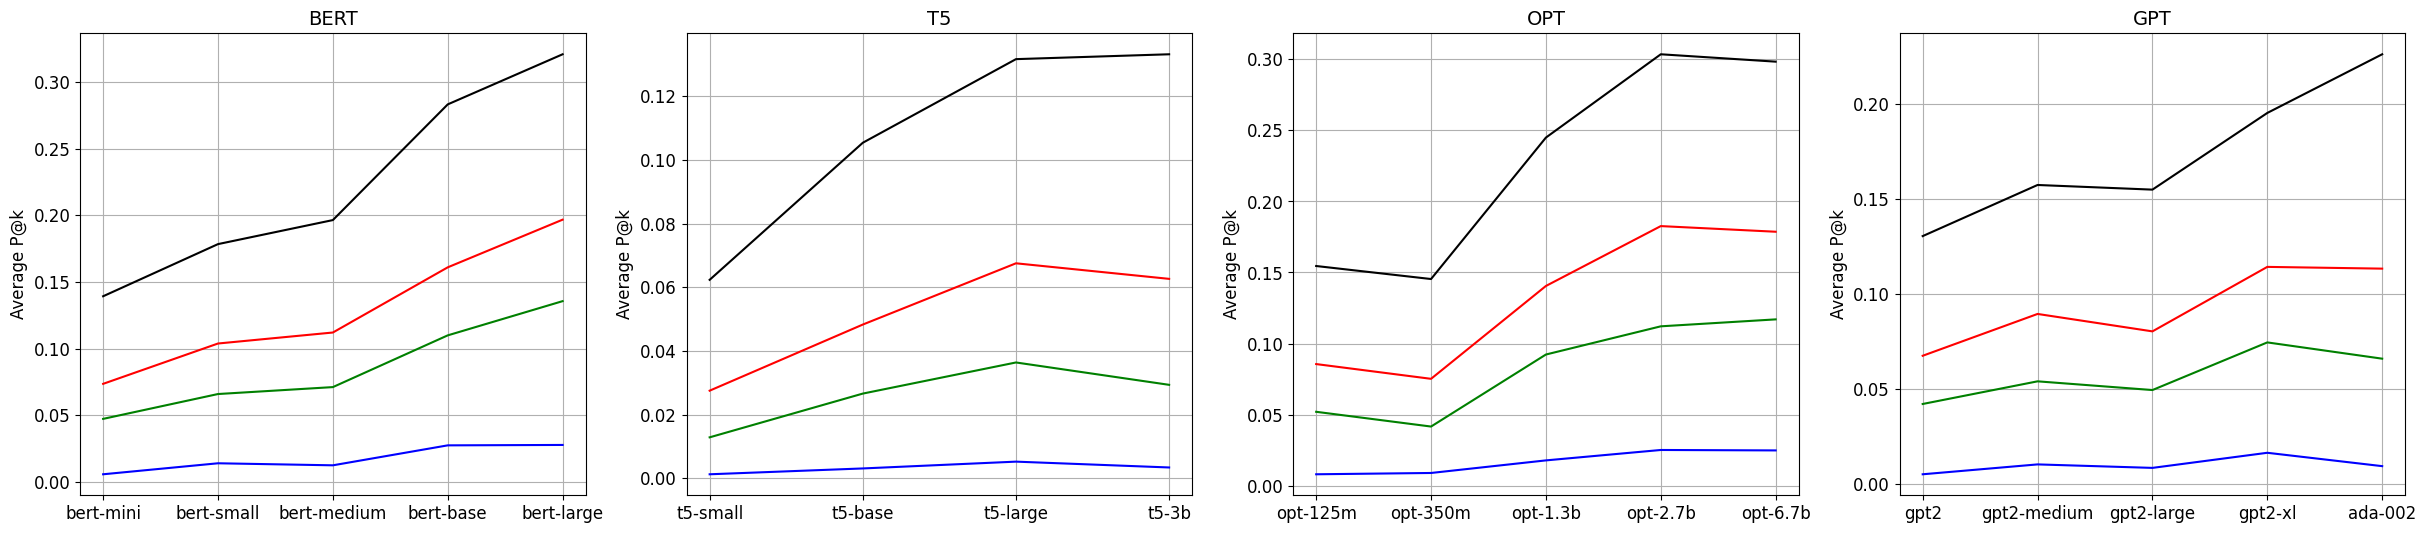

Data log_ridge_transe_places.txt


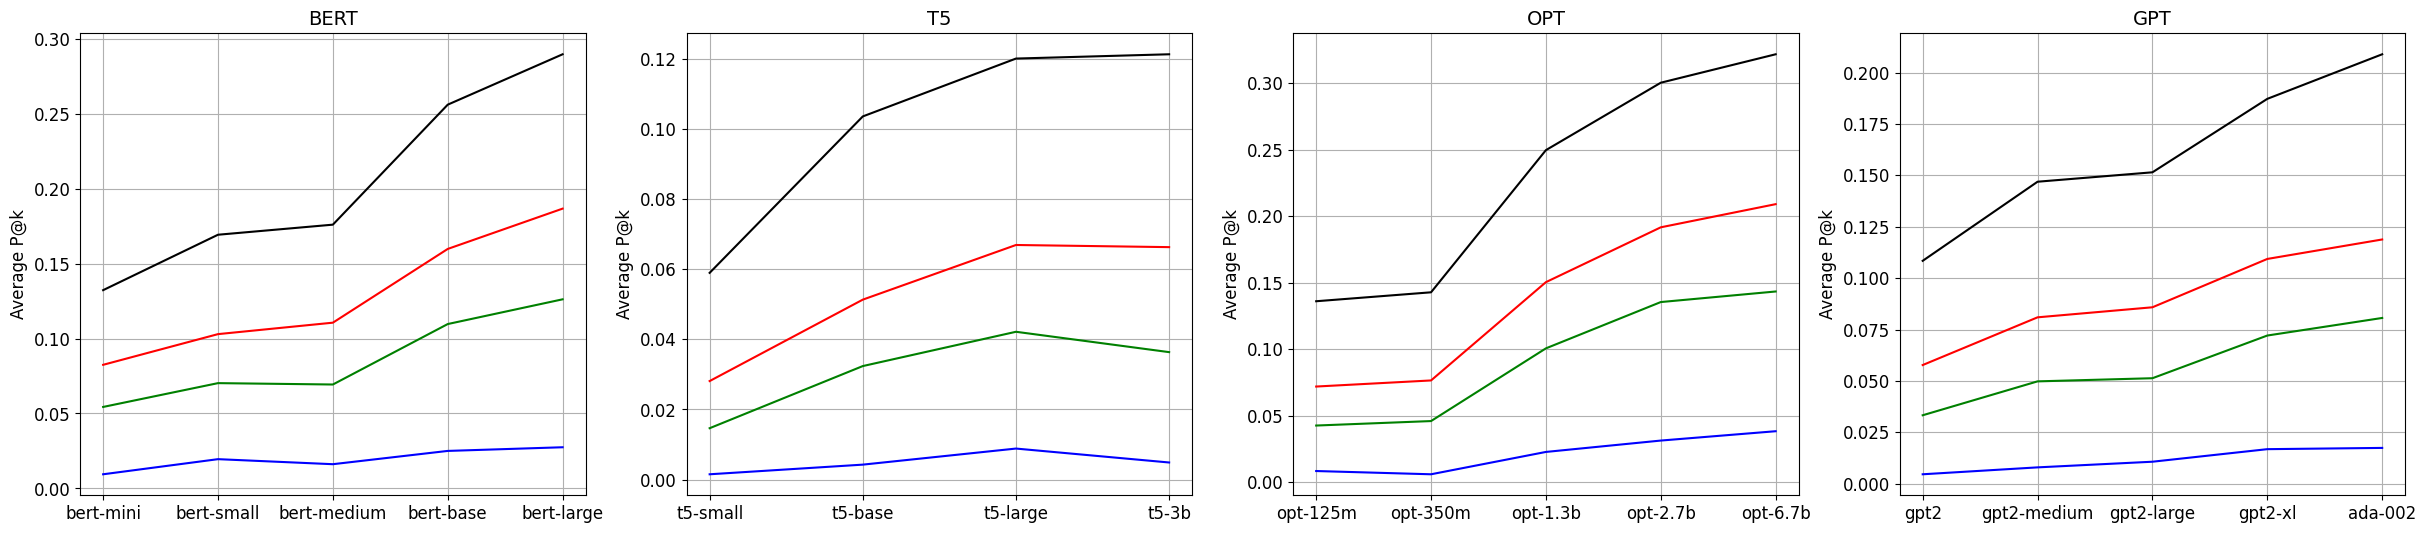

Data log_ridge_transe_20K_1_to_1_synsets.txt


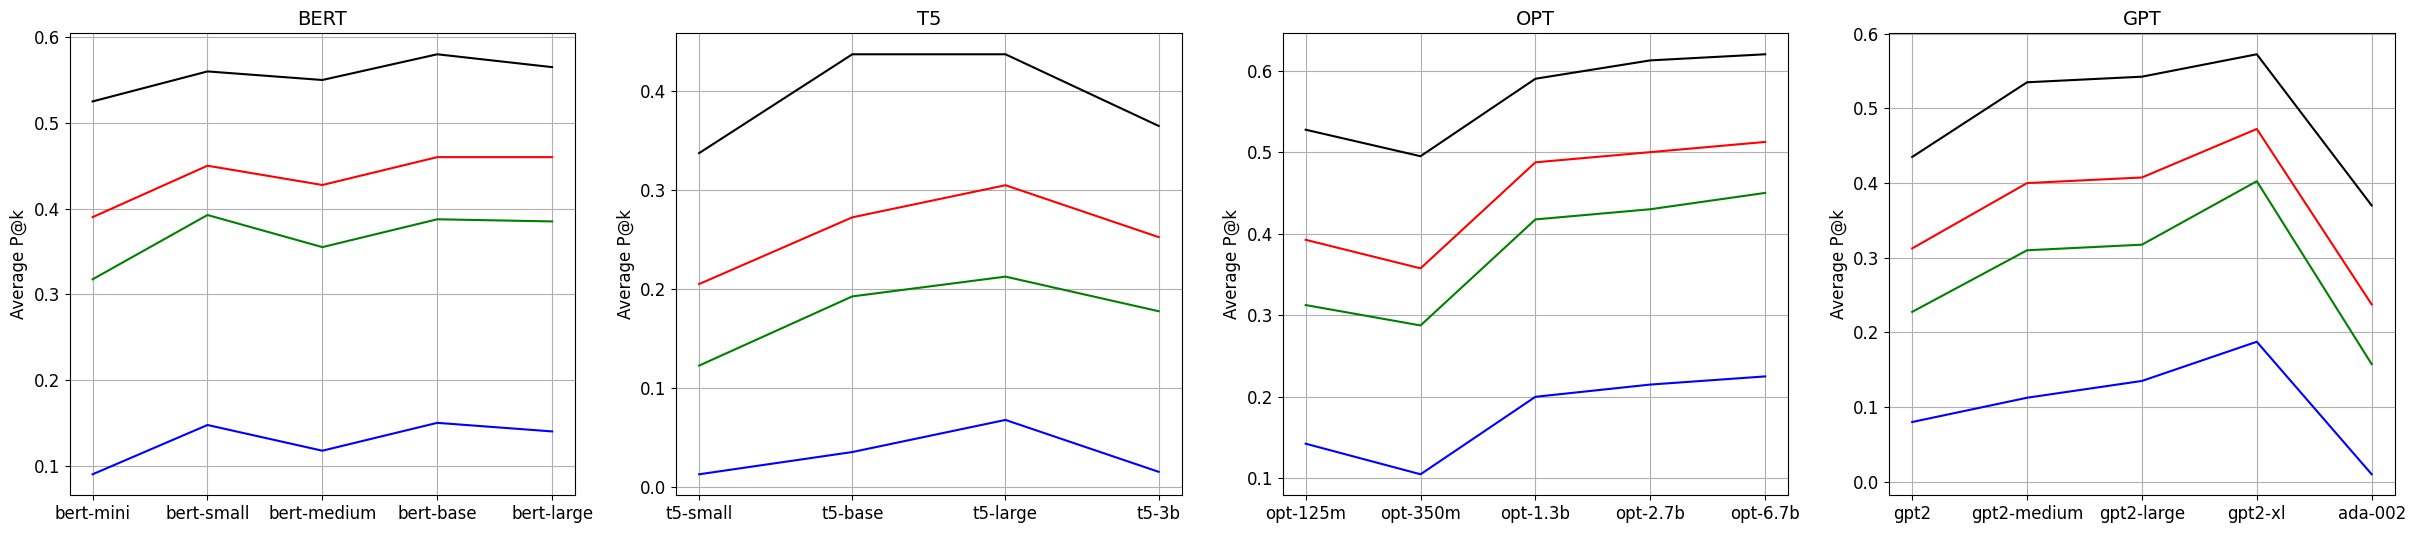

Data log_ridge_transe_20K_2_to_3_synsets.txt


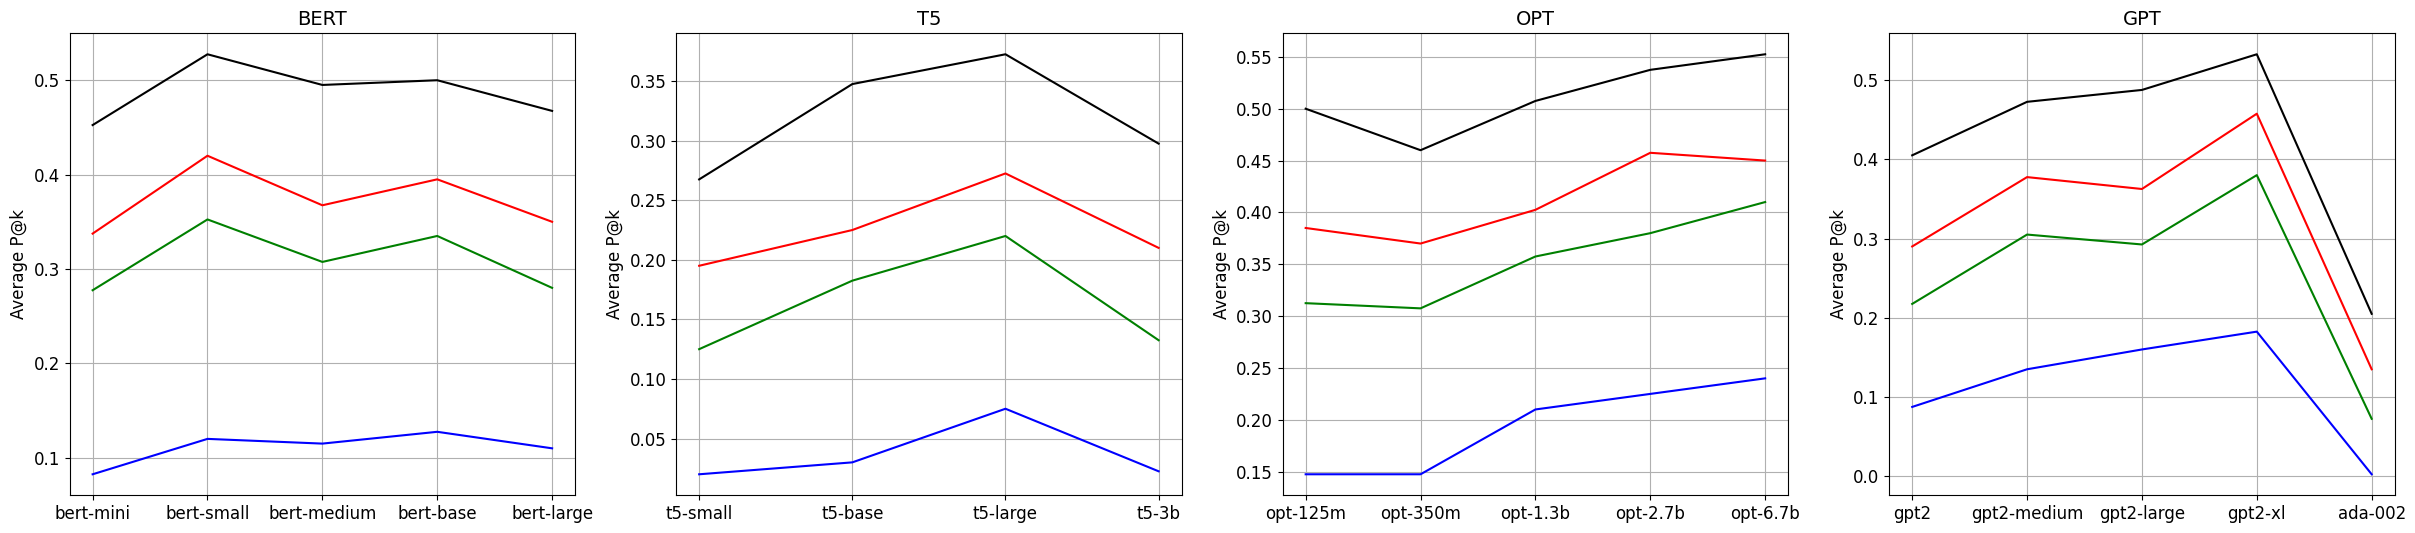

Data log_ridge_transe_20K_4_to_infinity_synsets.txt


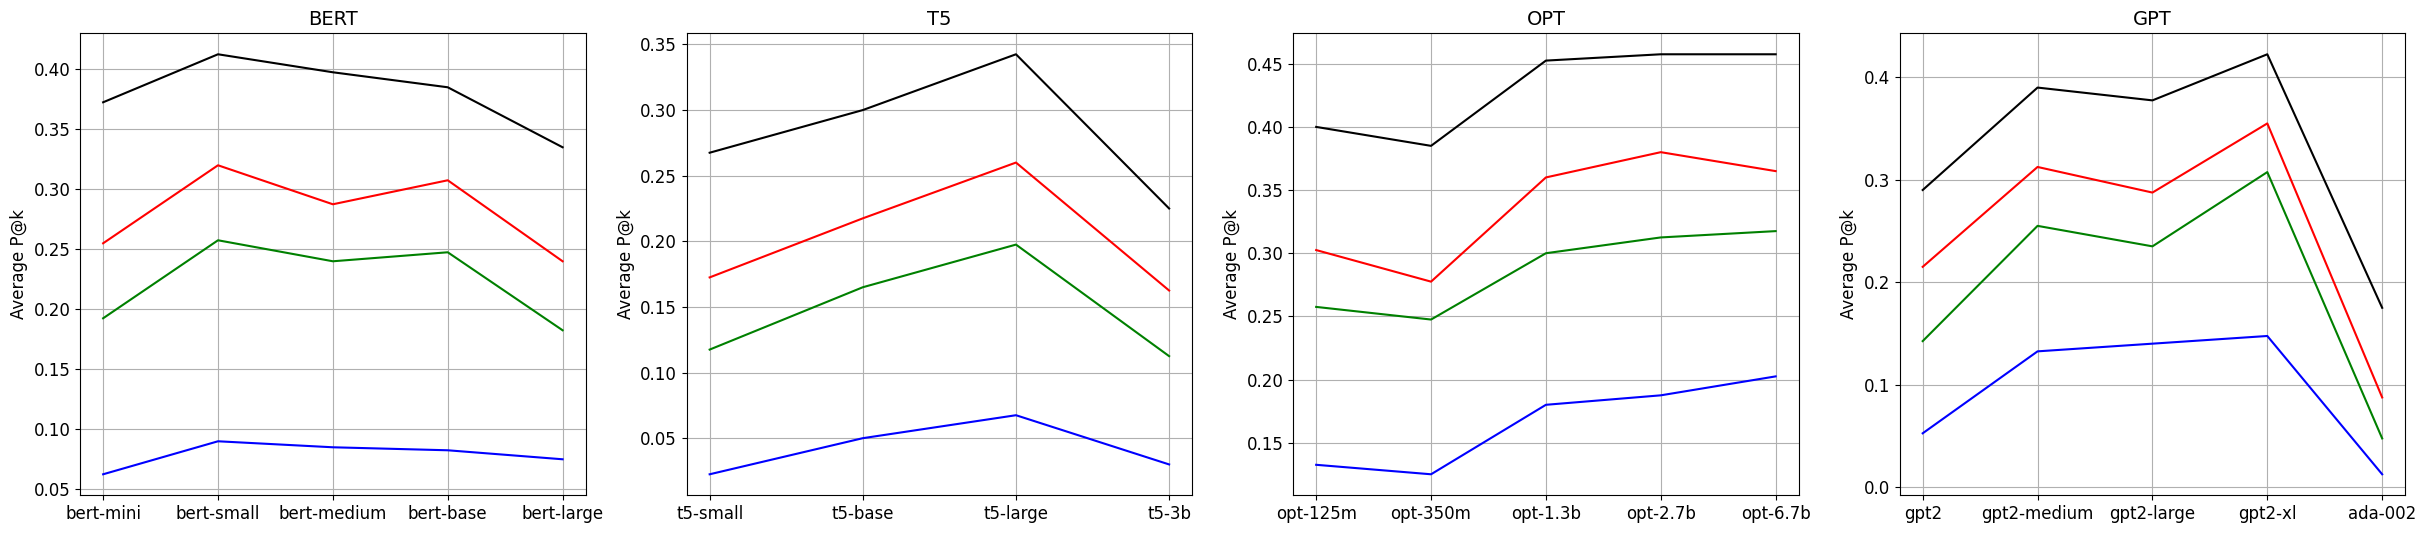

Data log_ridge_complex_20K_1_to_1_synsets.txt


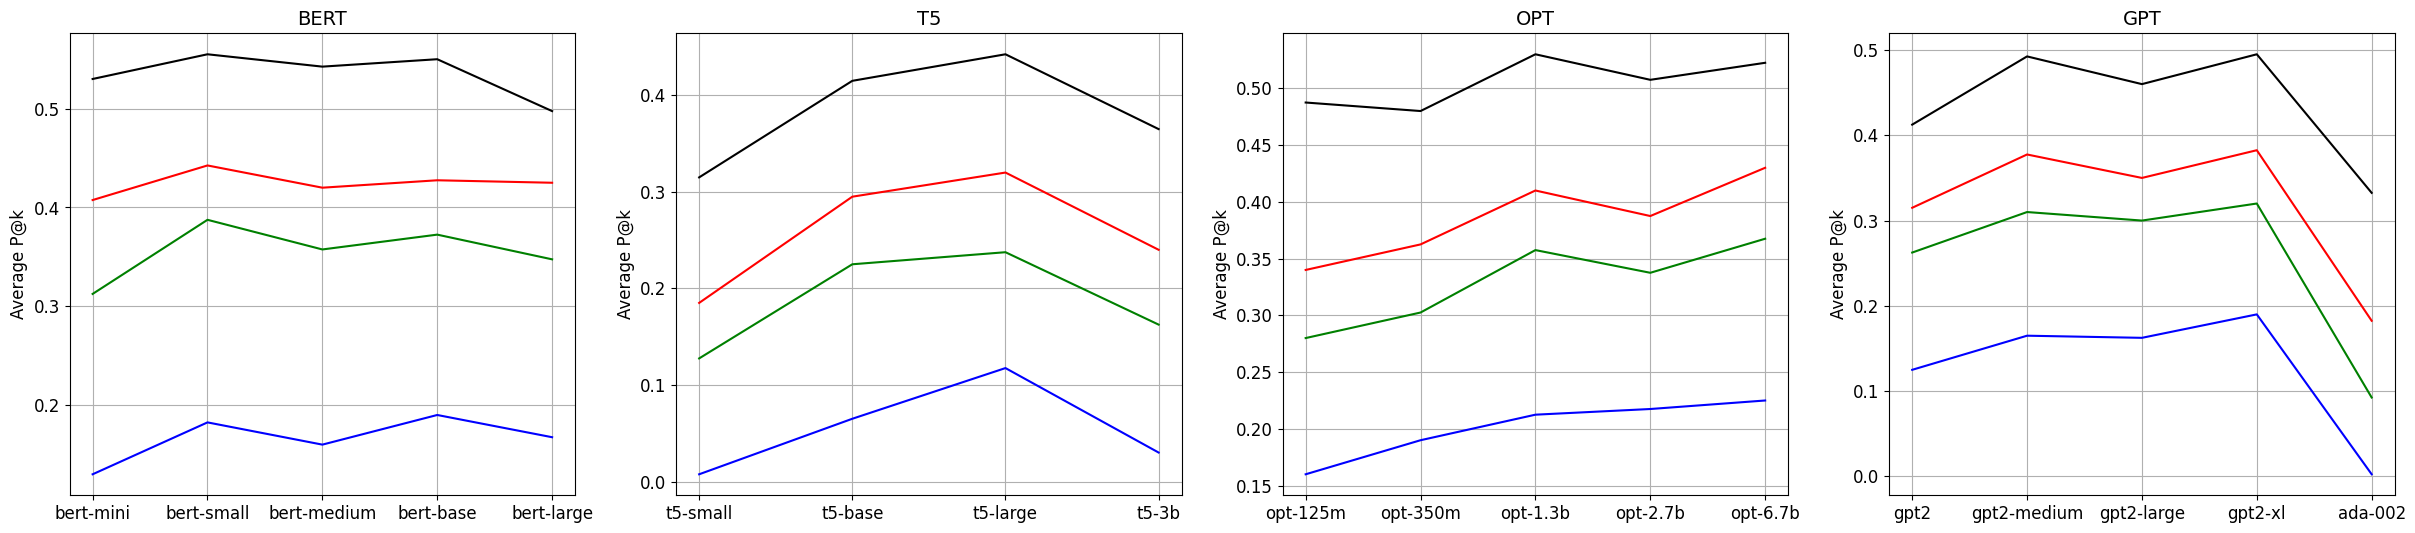

Data log_ridge_complex_20K_2_to_3_synsets.txt


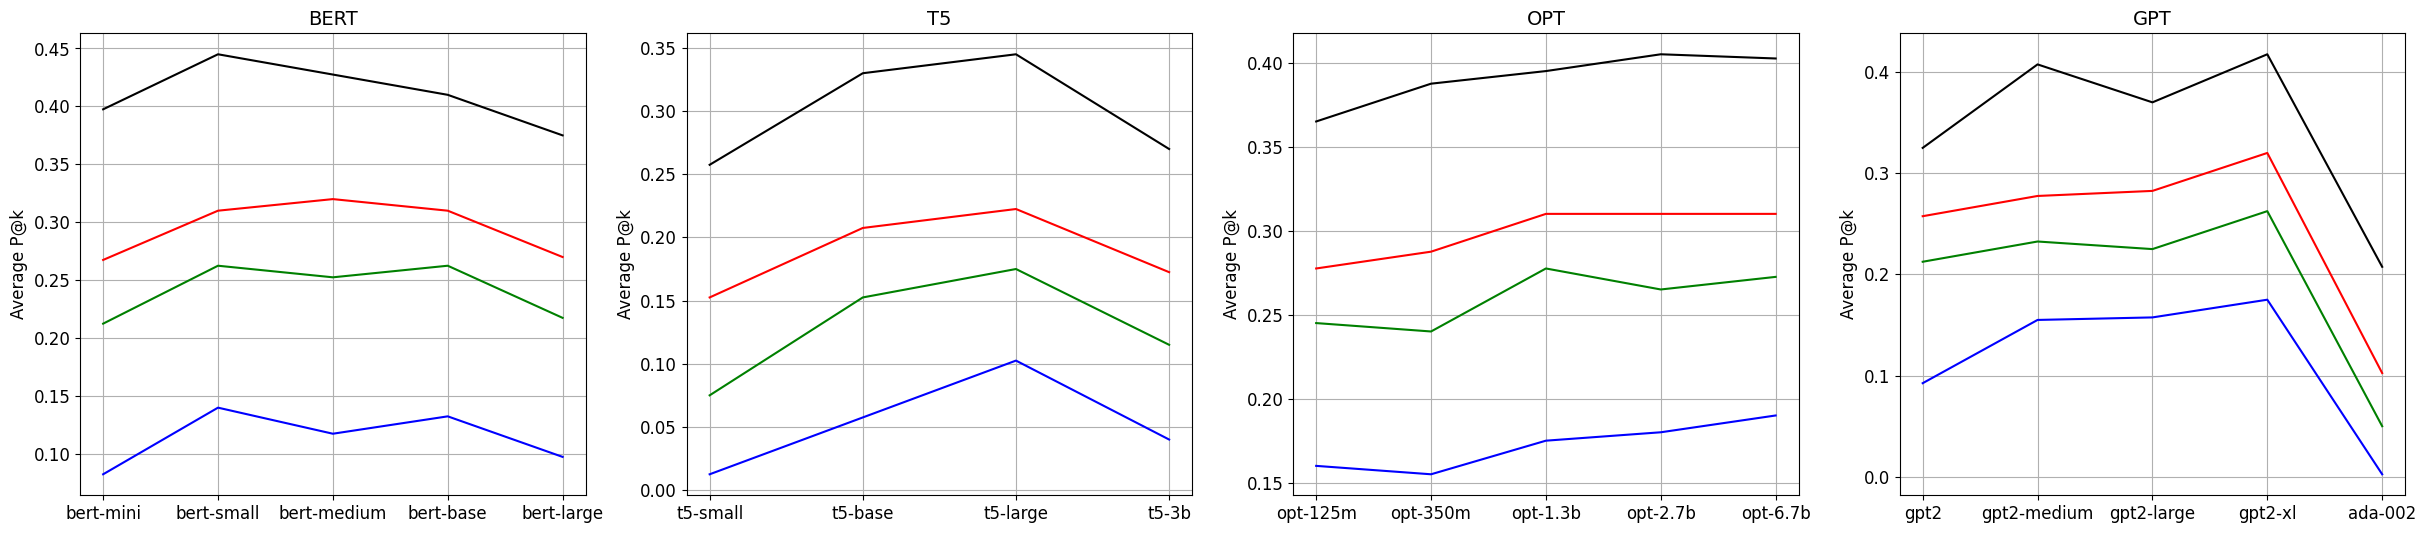

Data log_ridge_complex_20K_4_to_infinity_synsets.txt


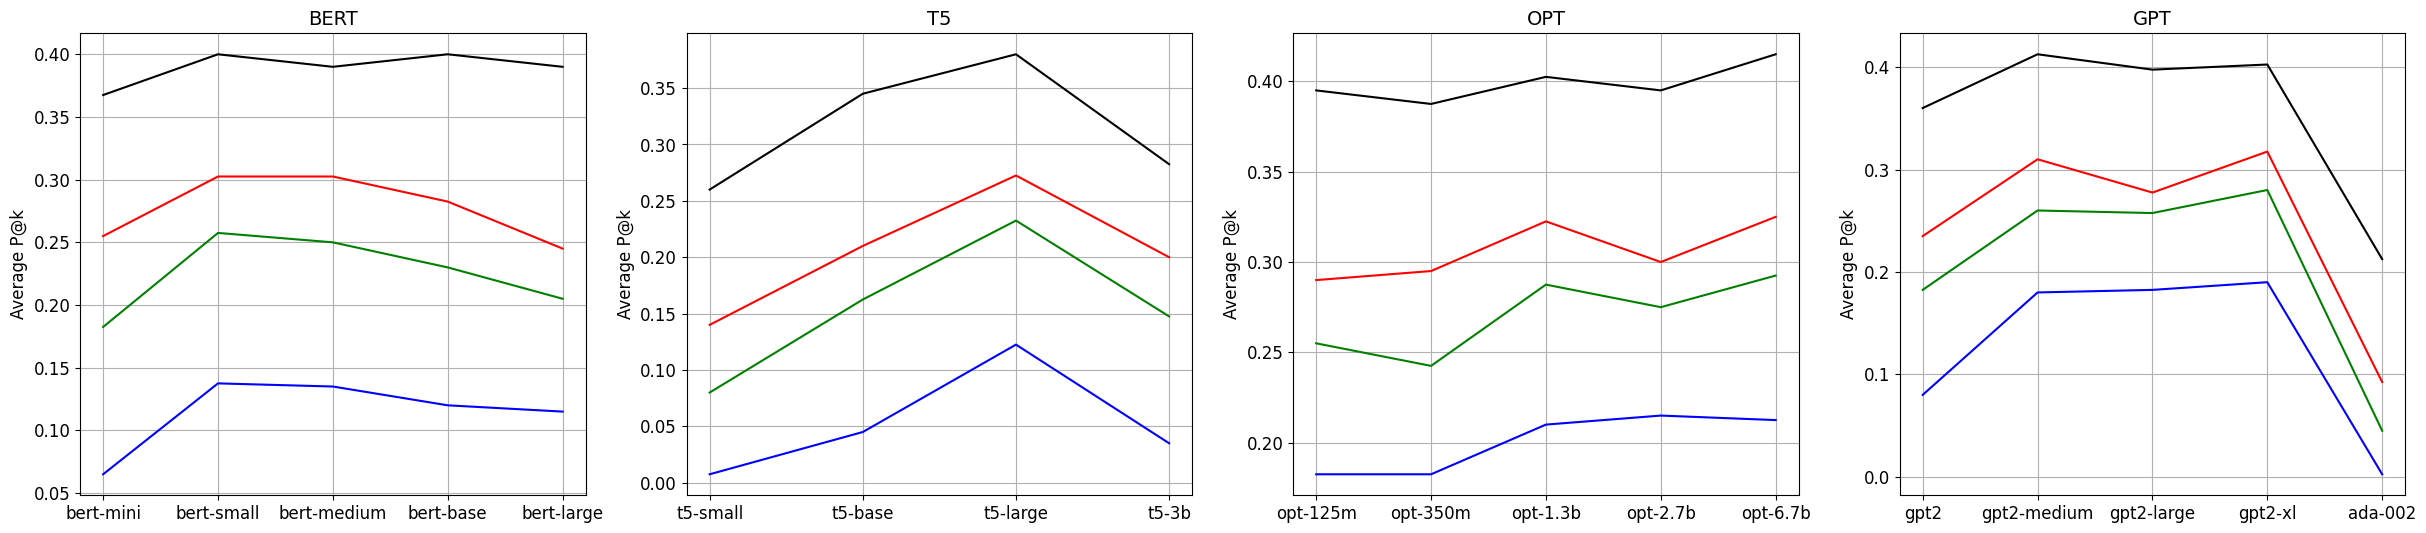

Data log_ridge_biggraph_20K_1_to_1_synsets.txt


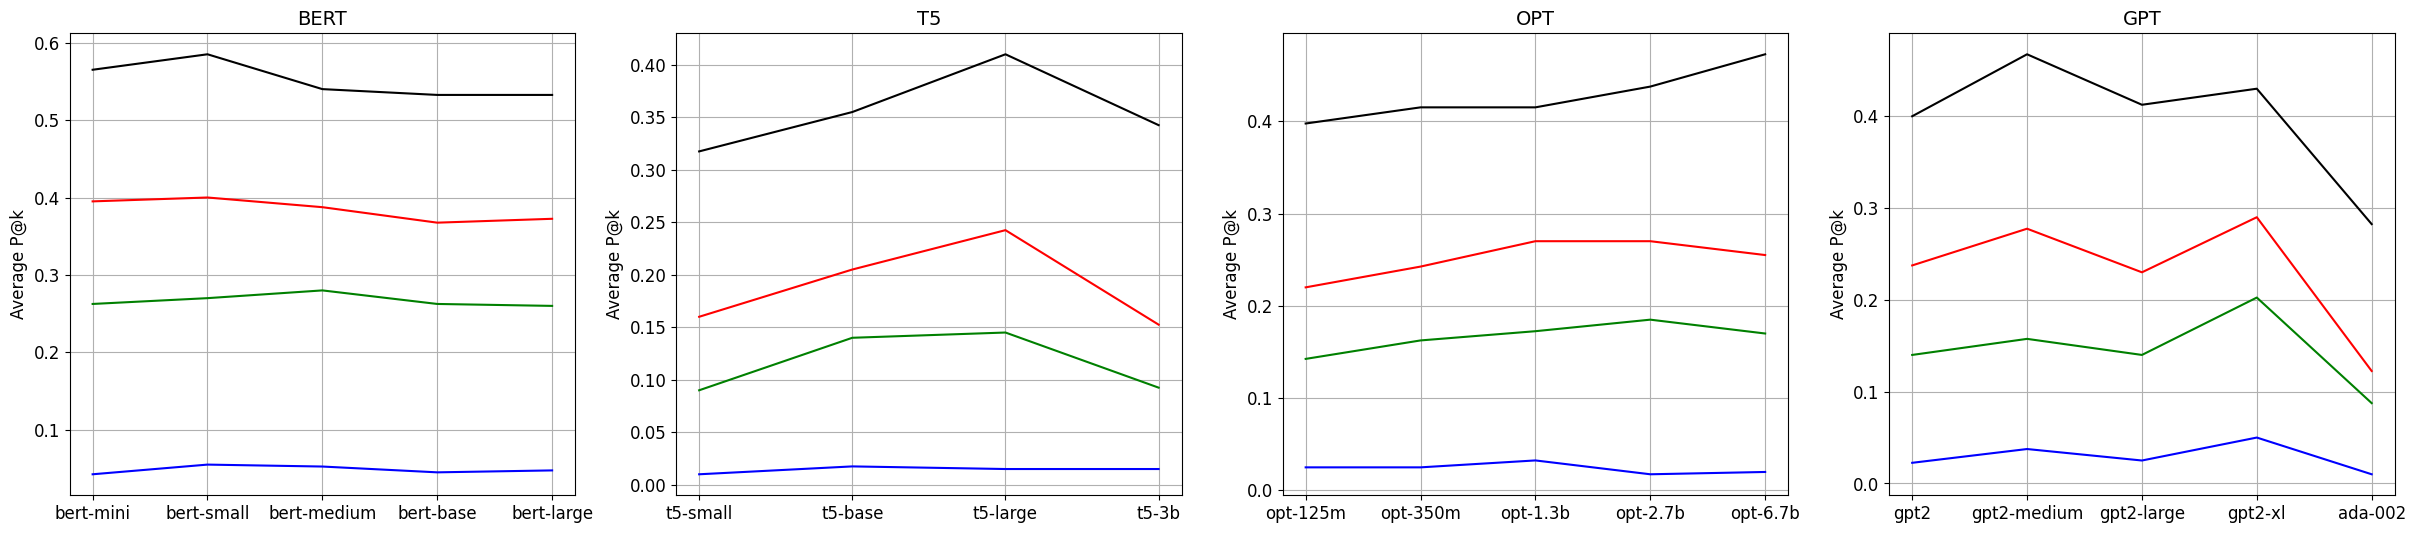

Data log_procrustes_biggraph_20K.txt


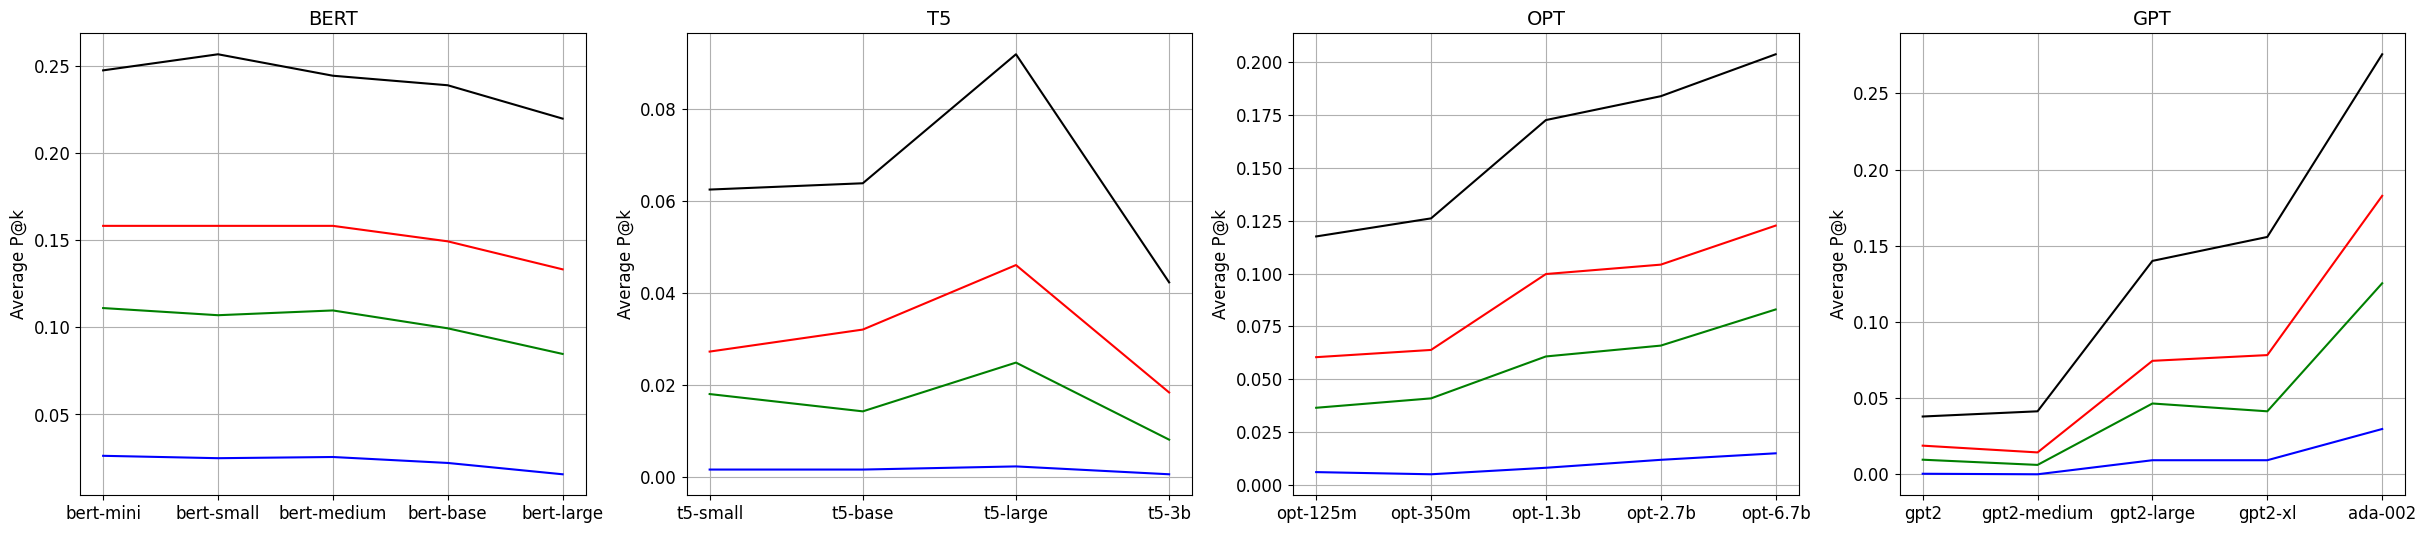

Data log_procrustes_biggraph_places.txt


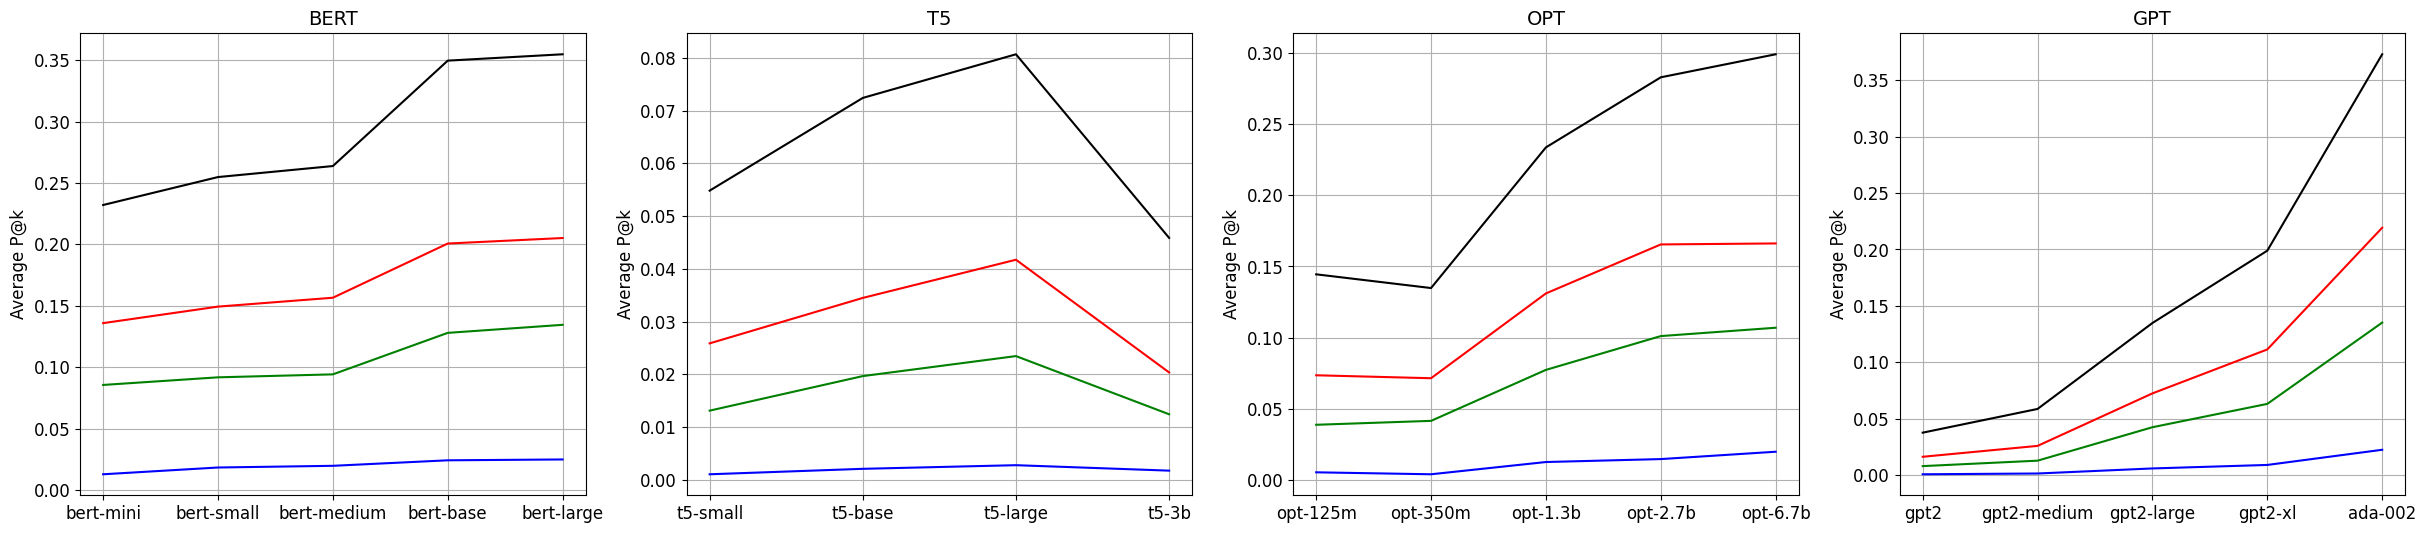

Data log_procrustes_biggraph_20K_1_to_1_synsets.txt


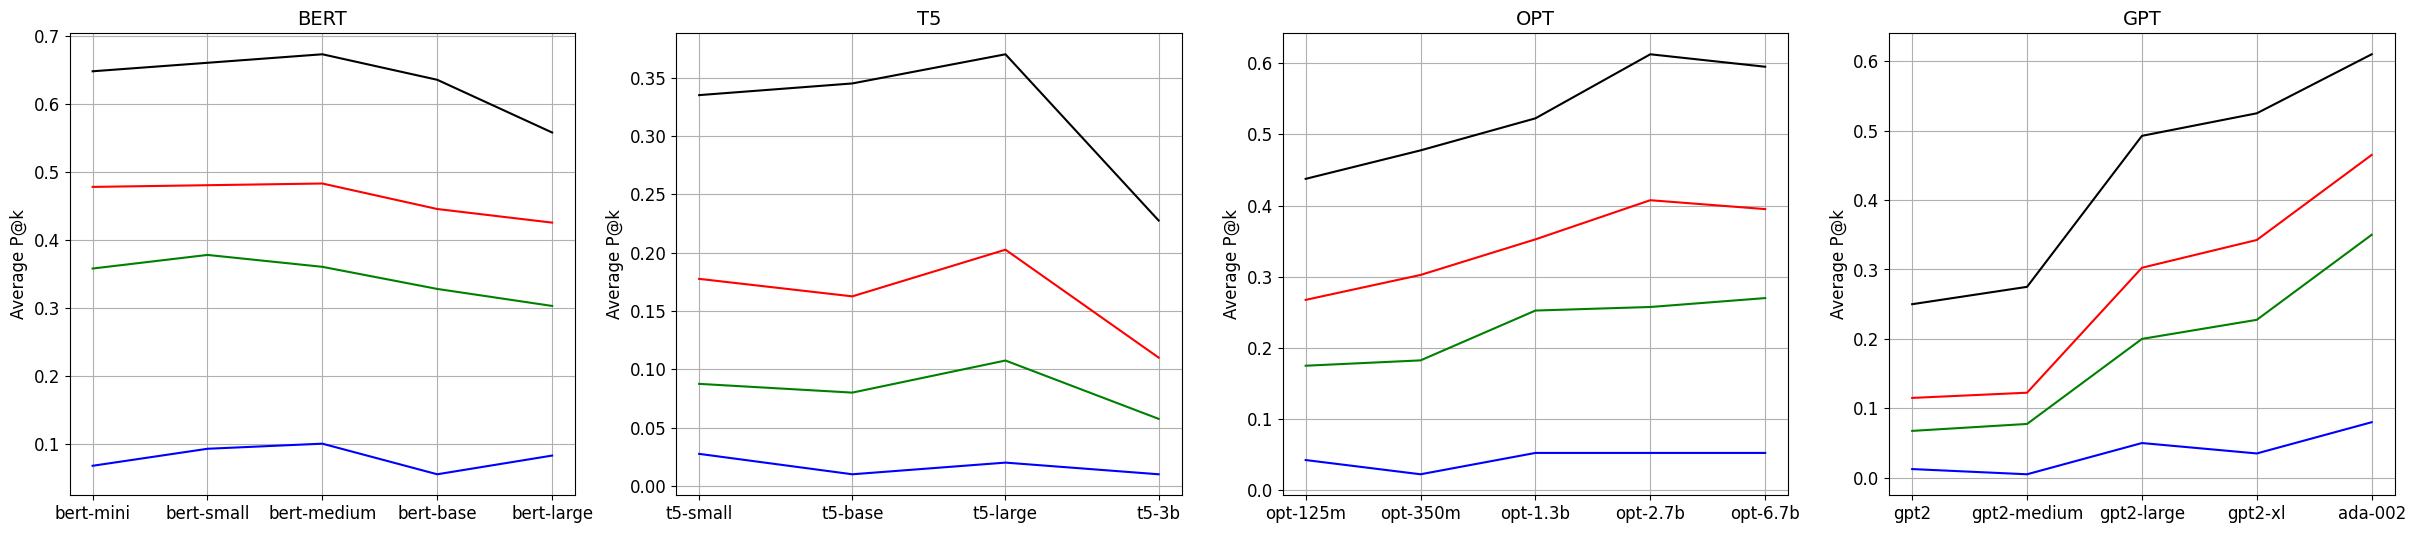

Data log_procrustes_biggraph_names.txt


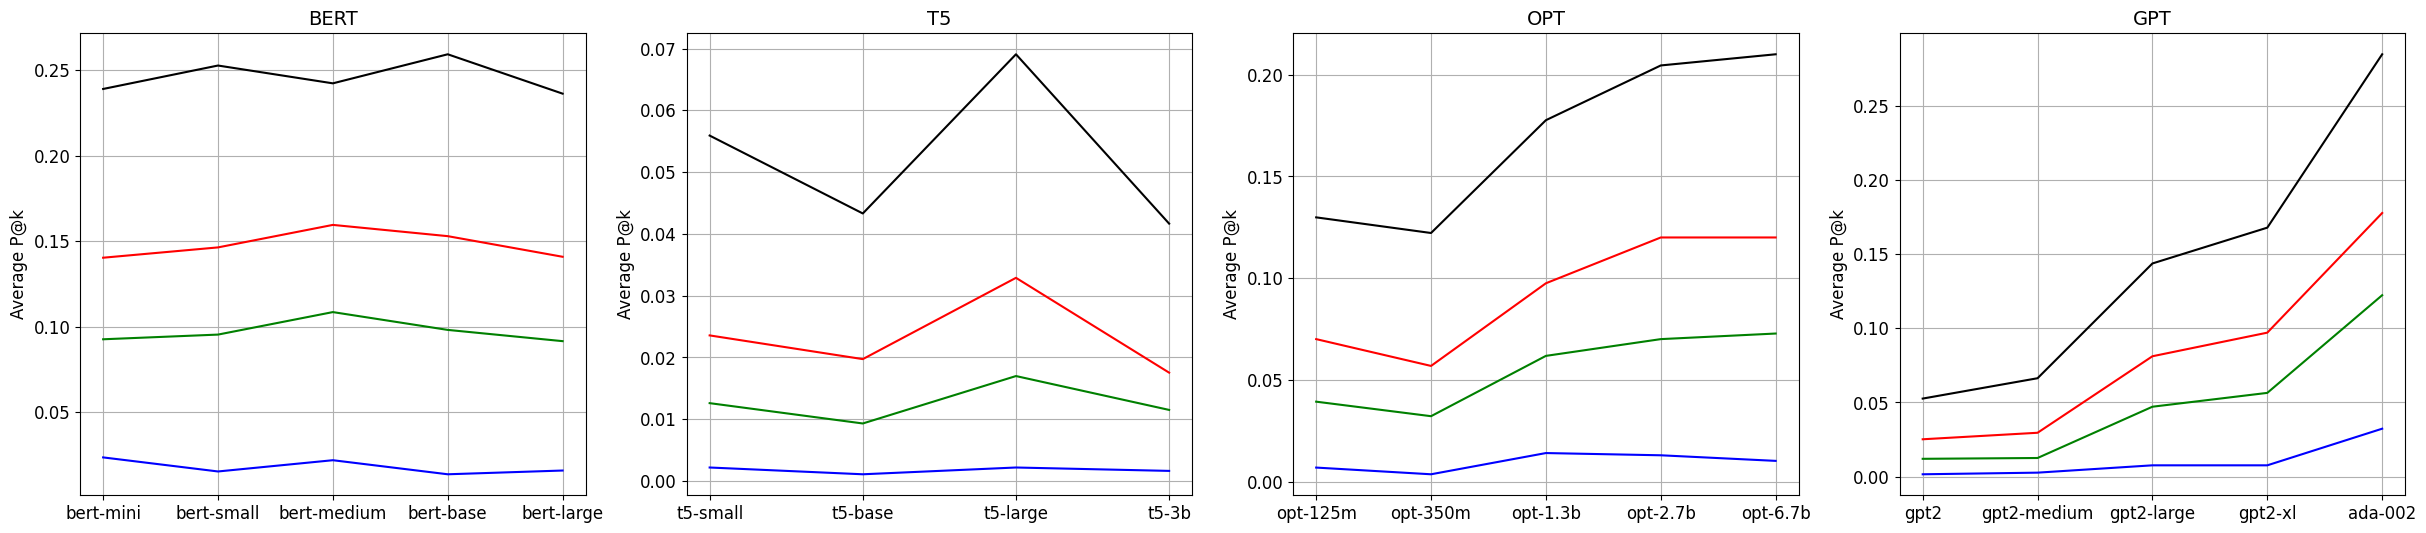

Data log_procrustes_biggraph_20K_2_to_3_synsets.txt


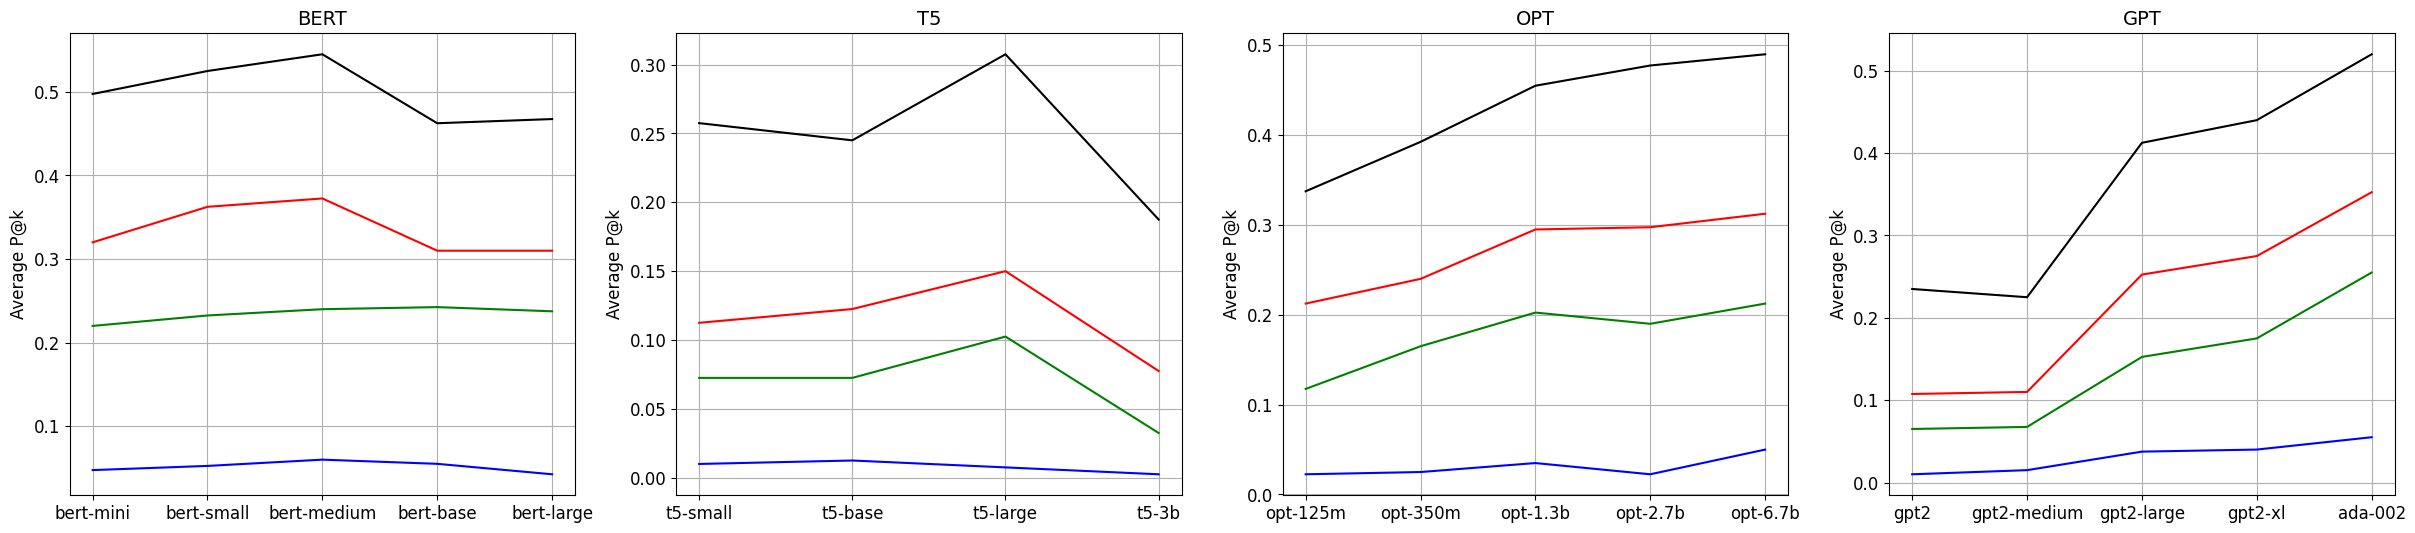

Data log_procrustes_biggraph_20K_4_to_infinity_synsets.txt


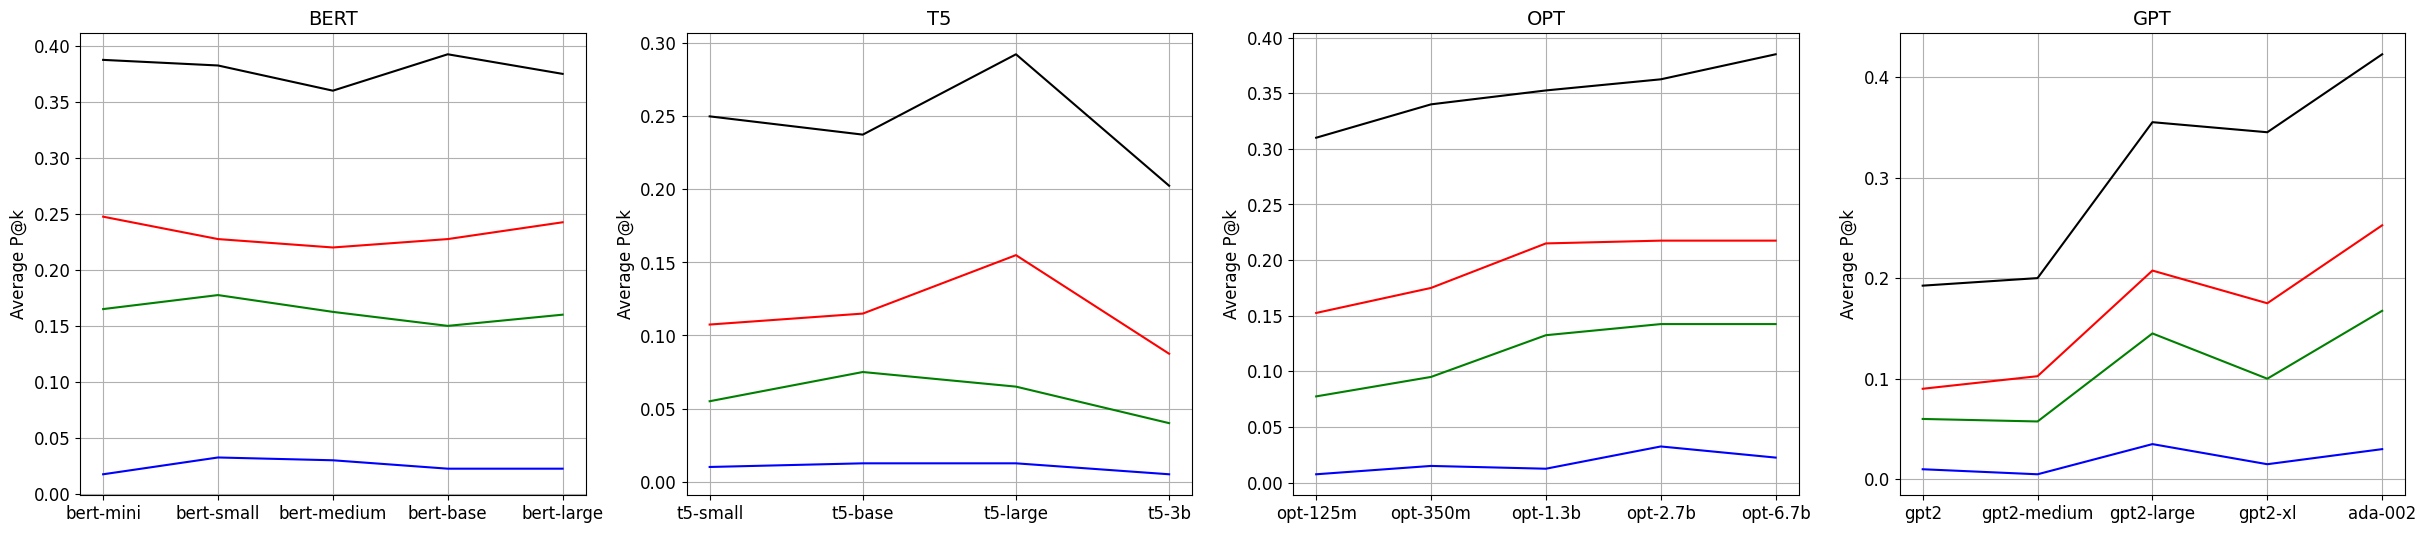

Data log_procrustes_transe_20K.txt


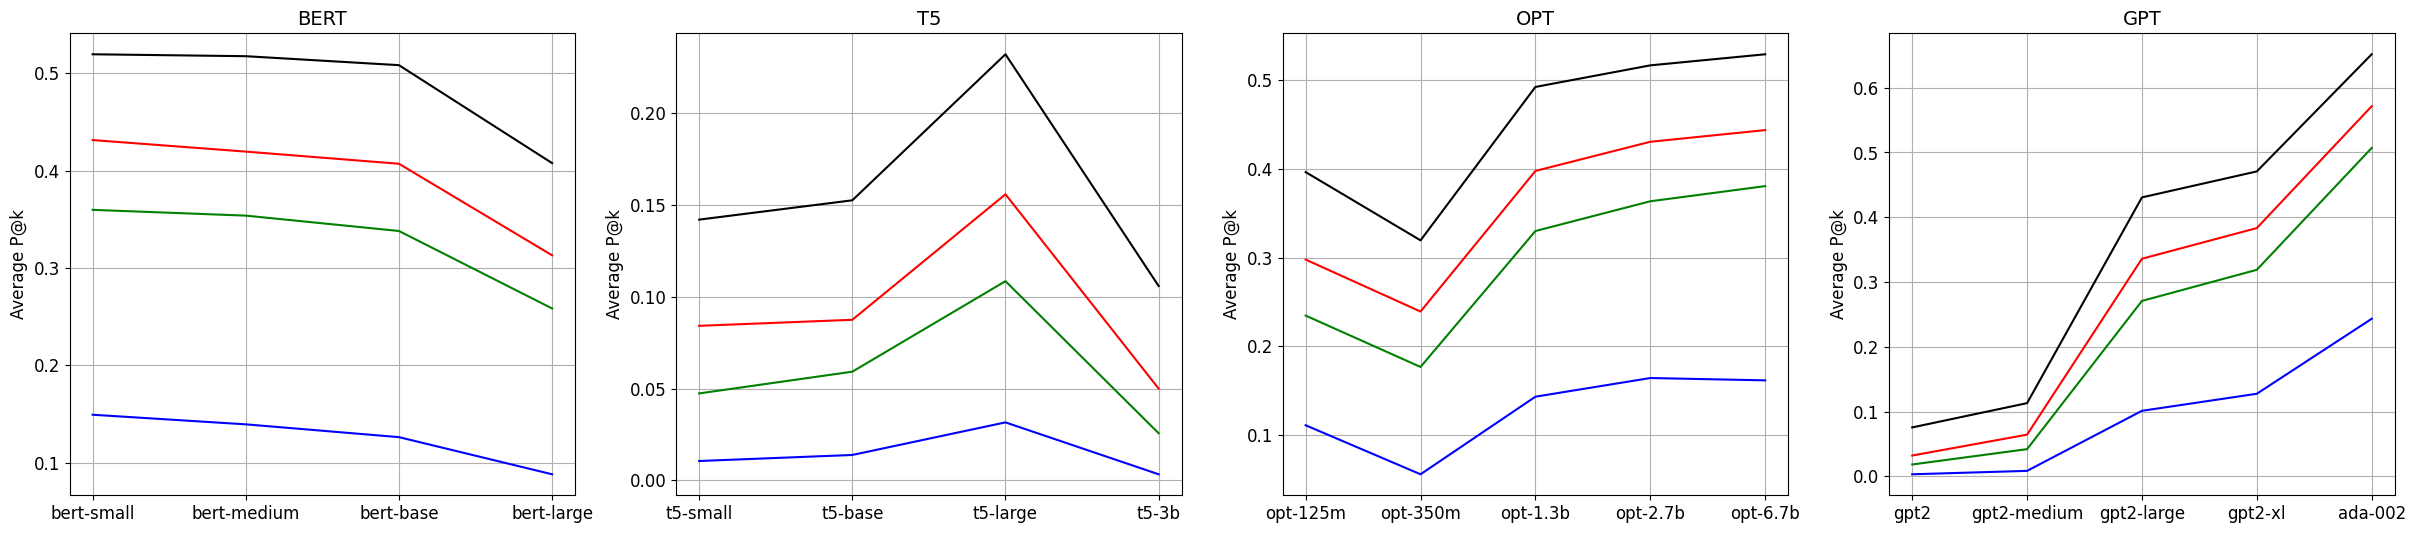

Data log_procrustes_transe_places.txt


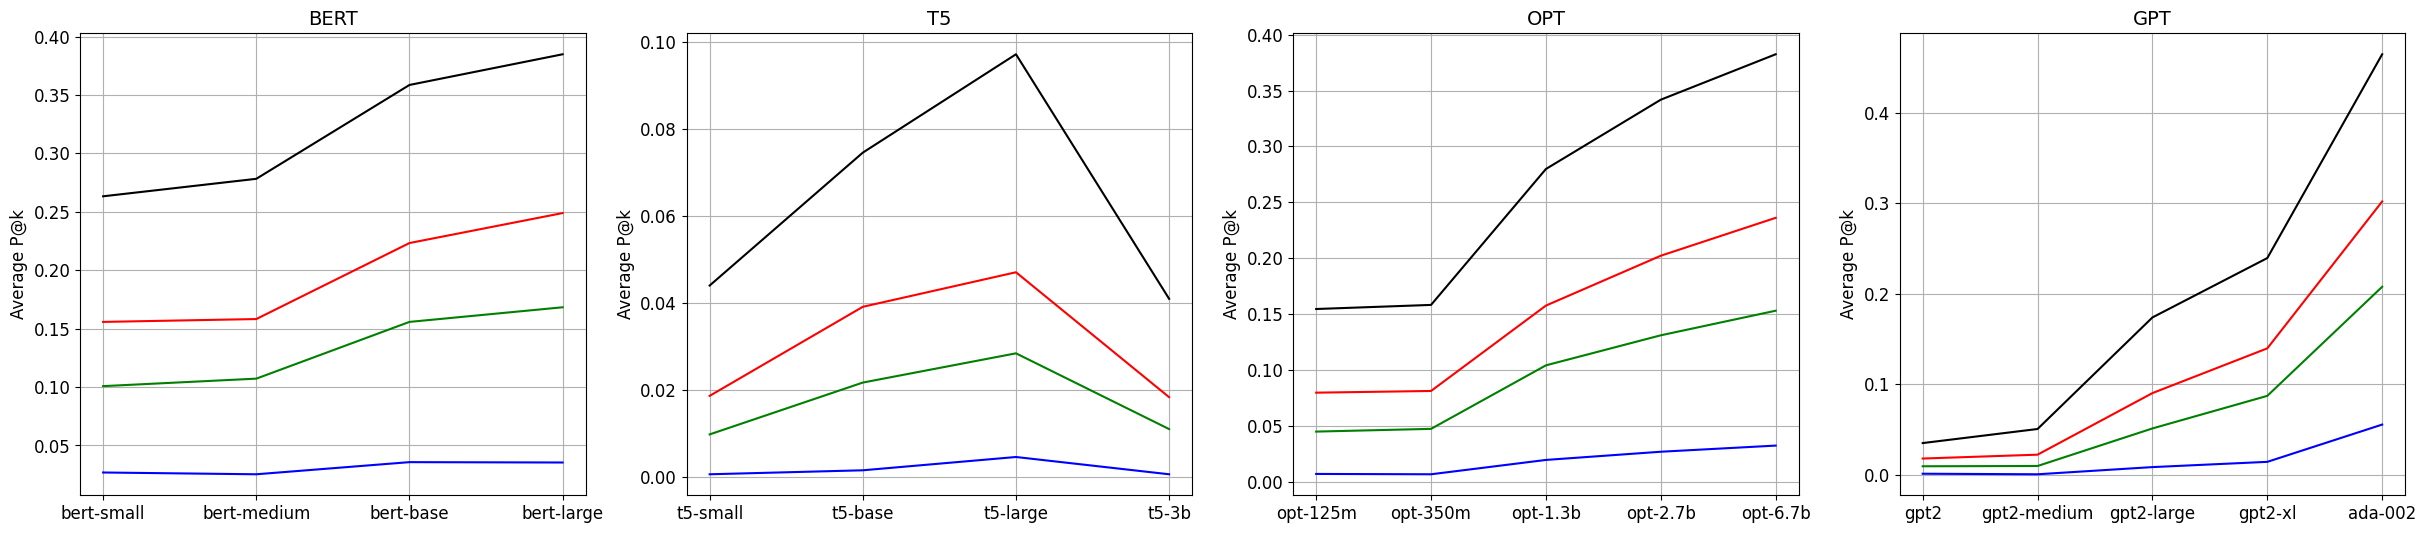

Data log_procrustes_transe_20K_1_to_1_synsets.txt


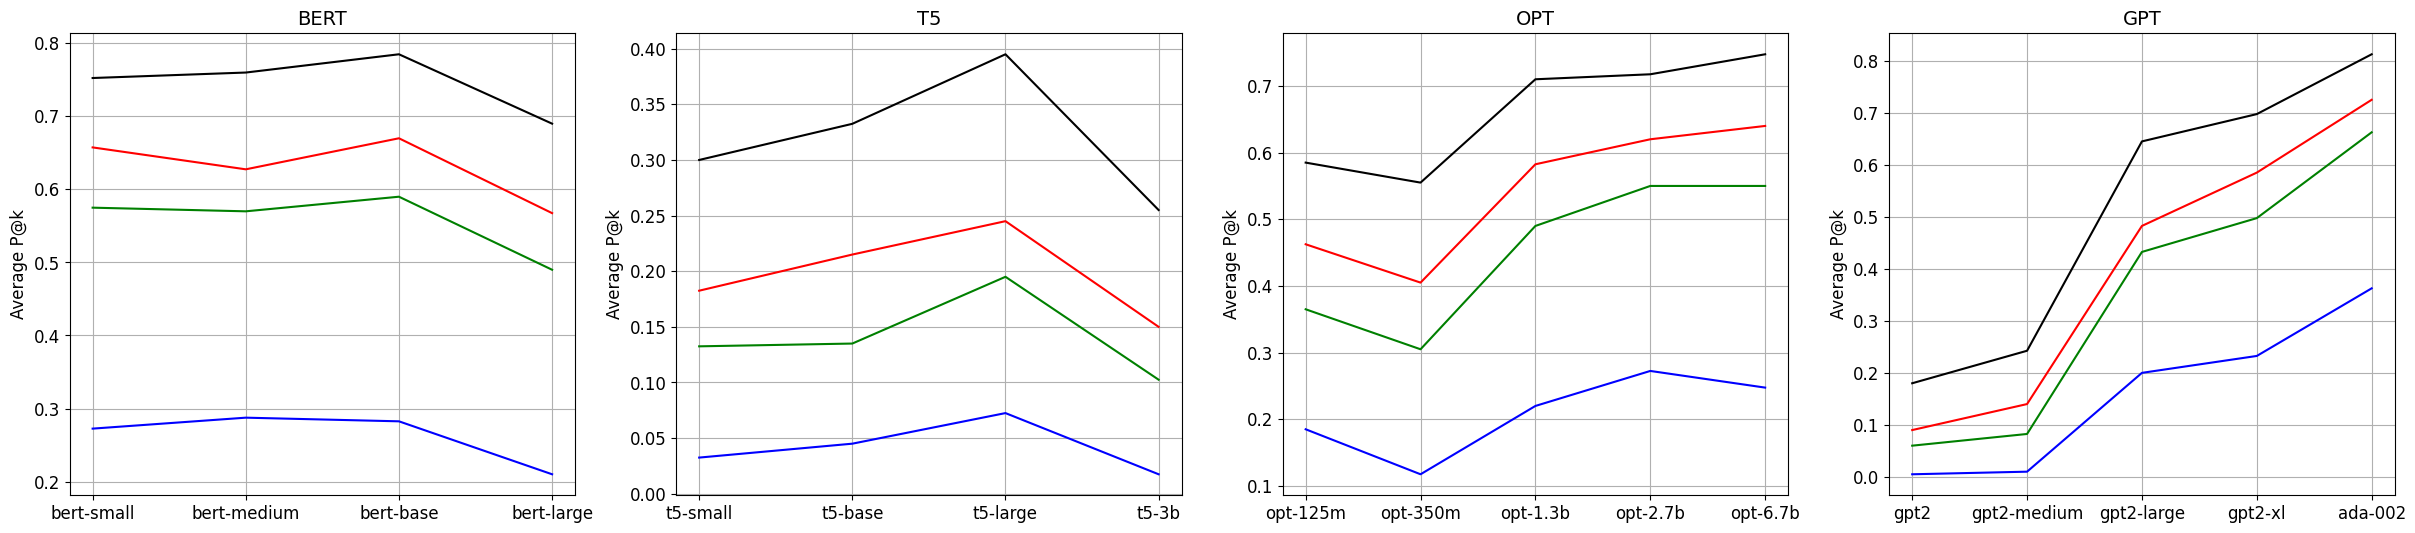

Data log_procrustes_transe_names.txt


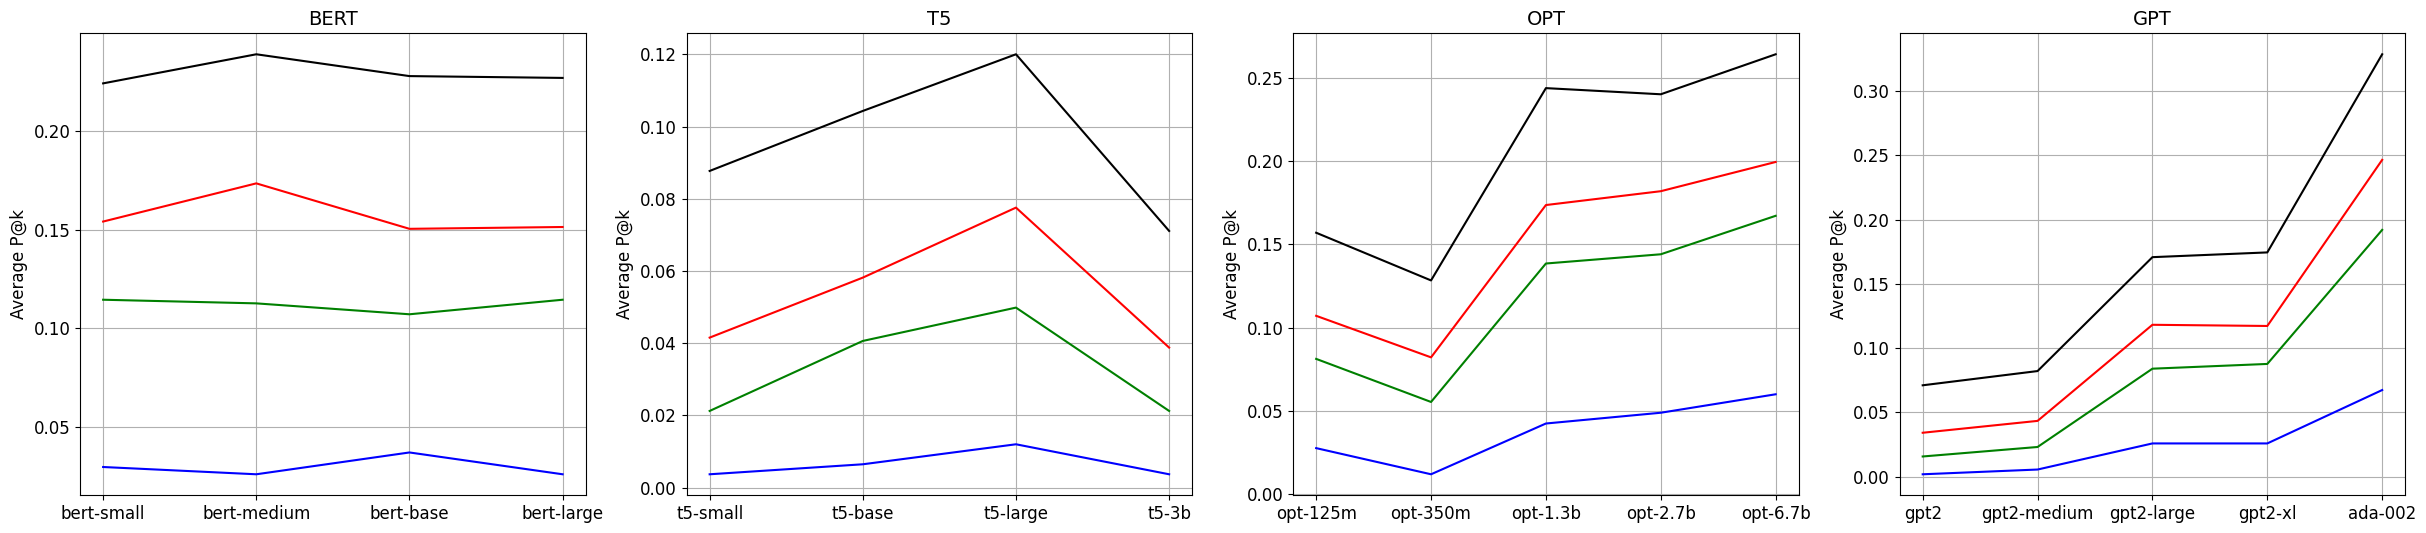

Data log_procrustes_transe_20K_2_to_3_synsets.txt


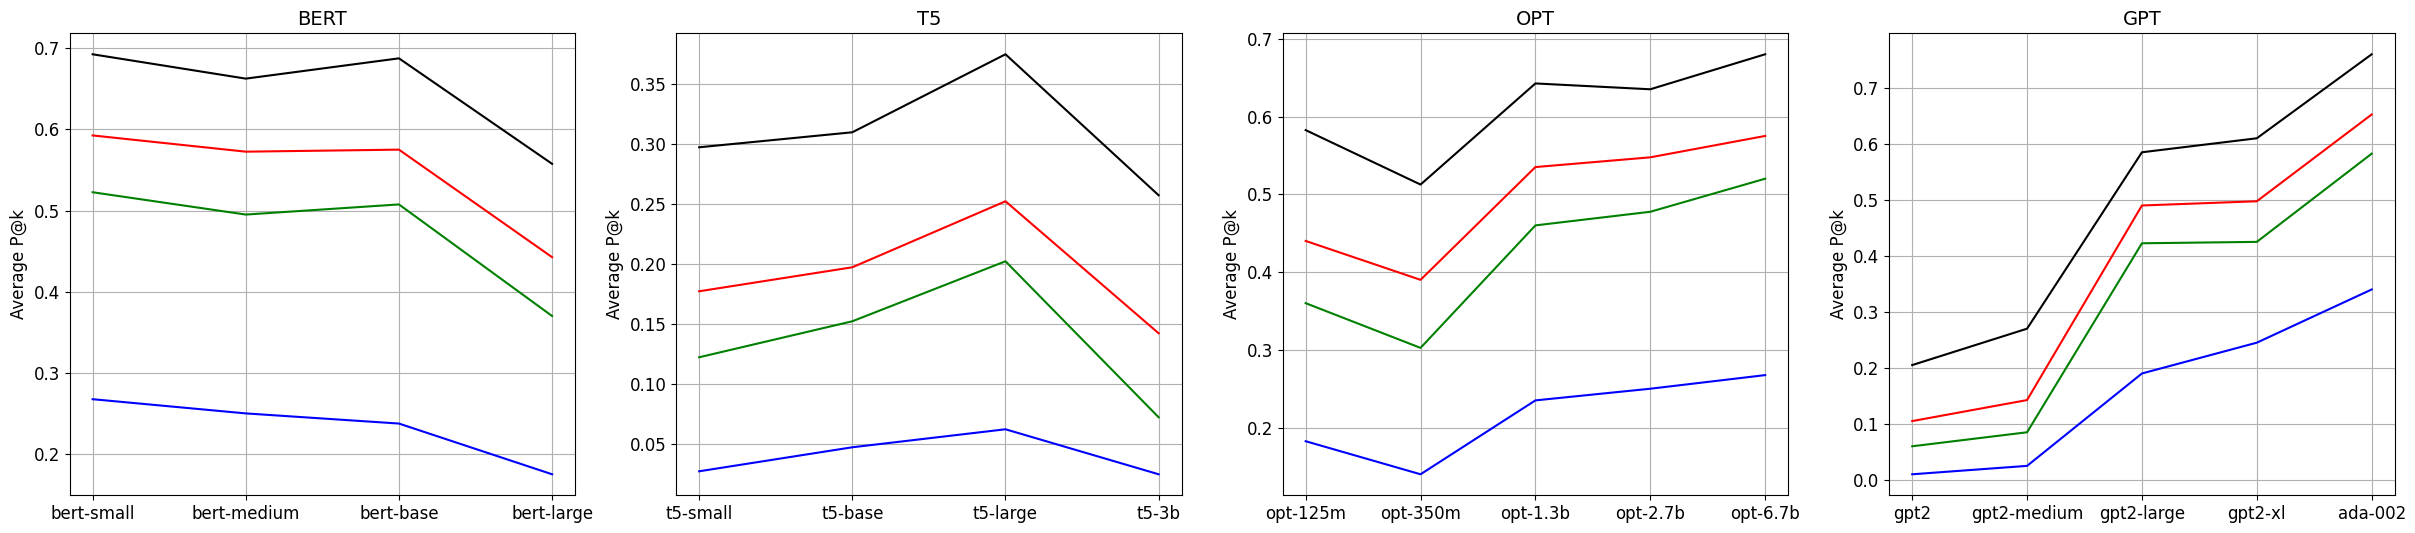

Data log_procrustes_transe_20K_4_to_infinity_synsets.txt


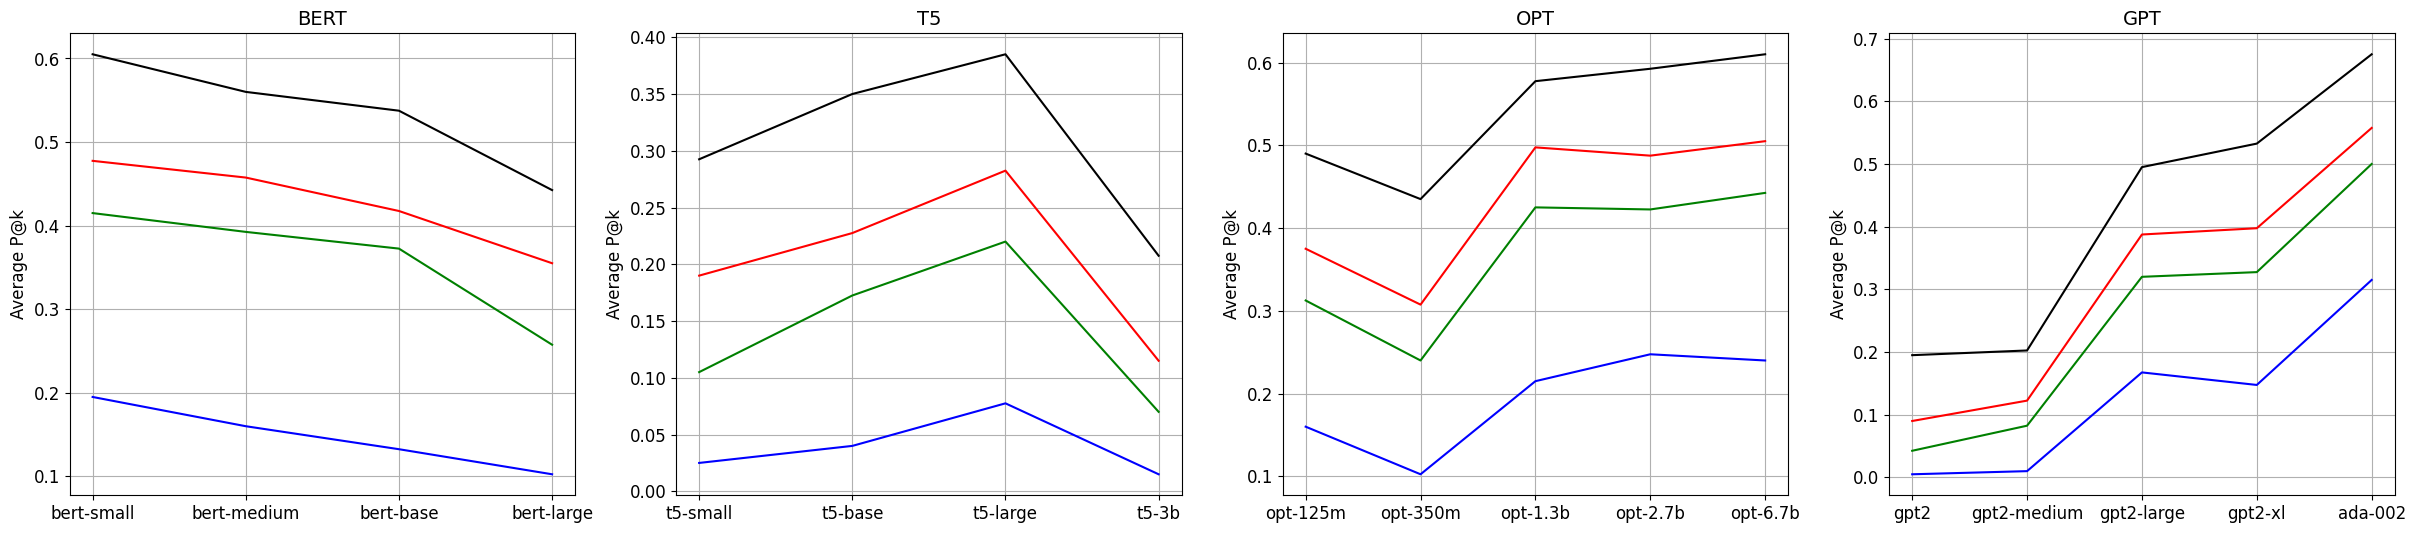

Data log_procrustes_complex_20K.txt


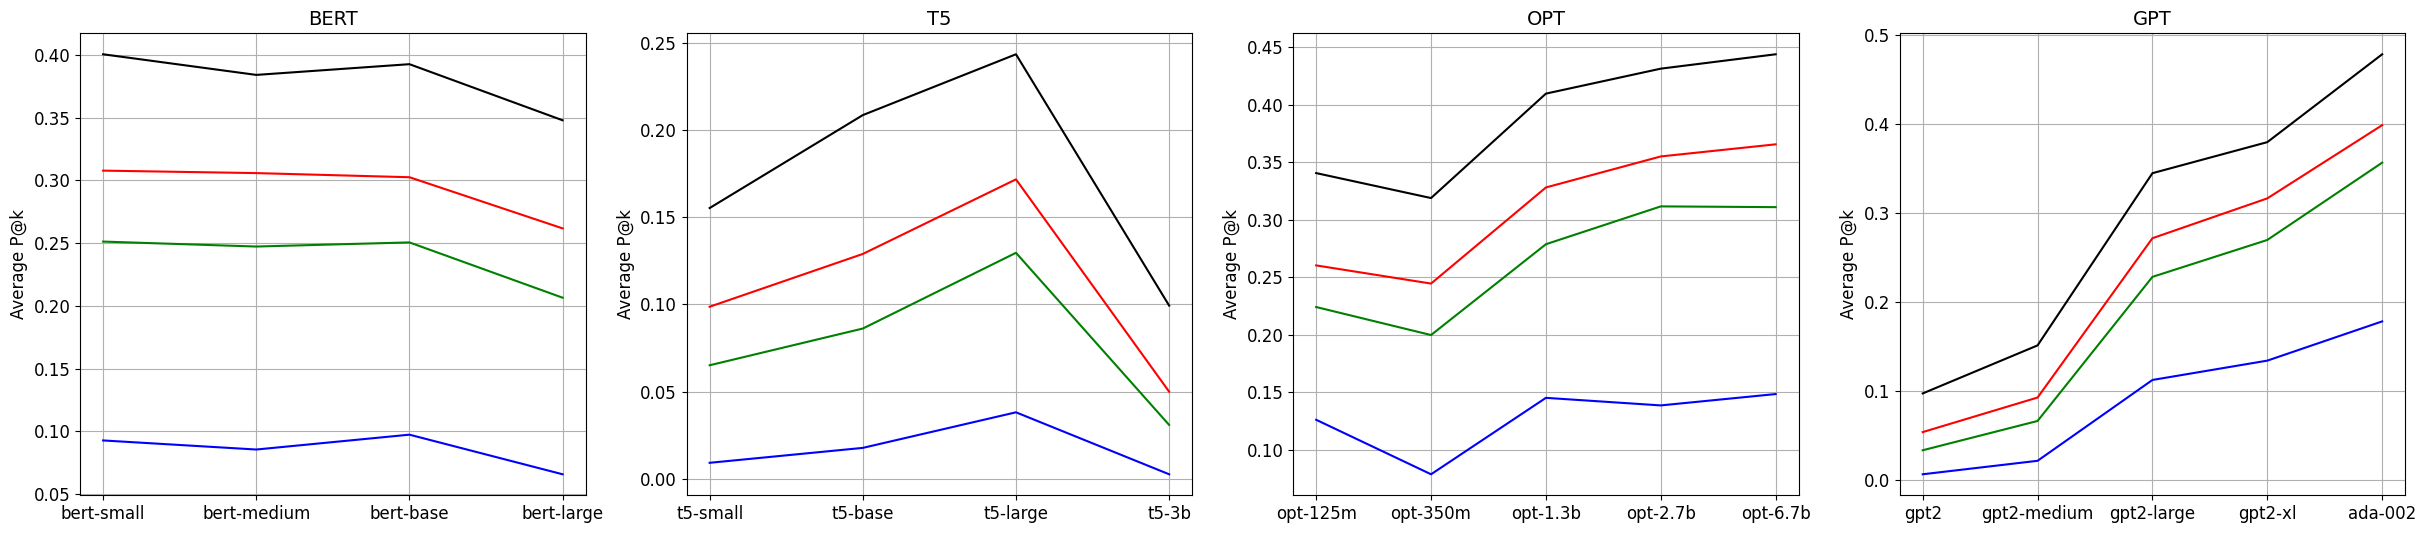

Data log_procrustes_complex_places.txt


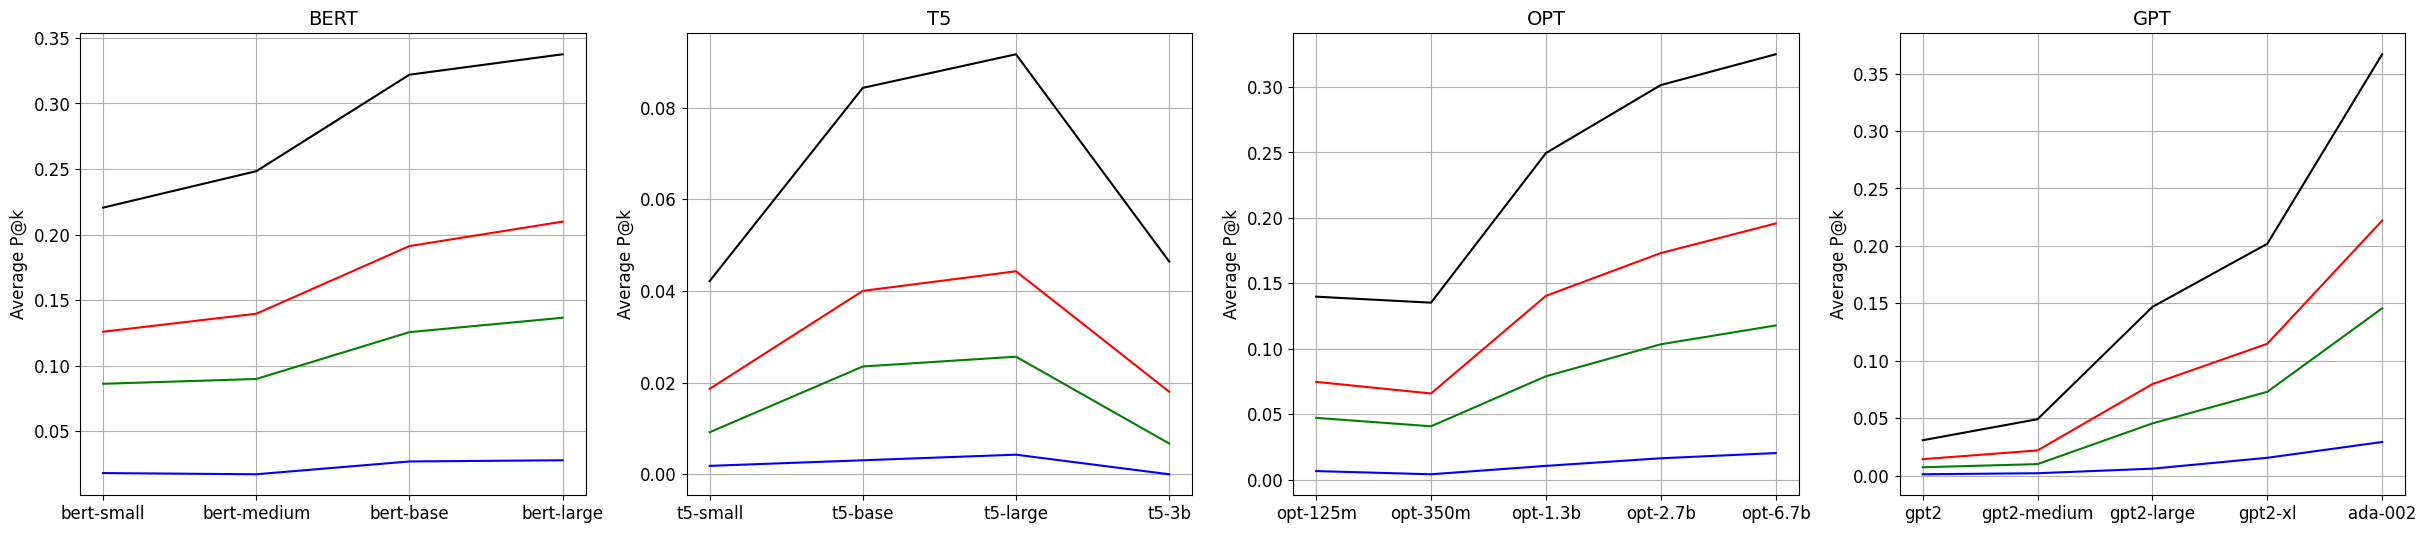

Data log_procrustes_complex_20K_1_to_1_synsets.txt


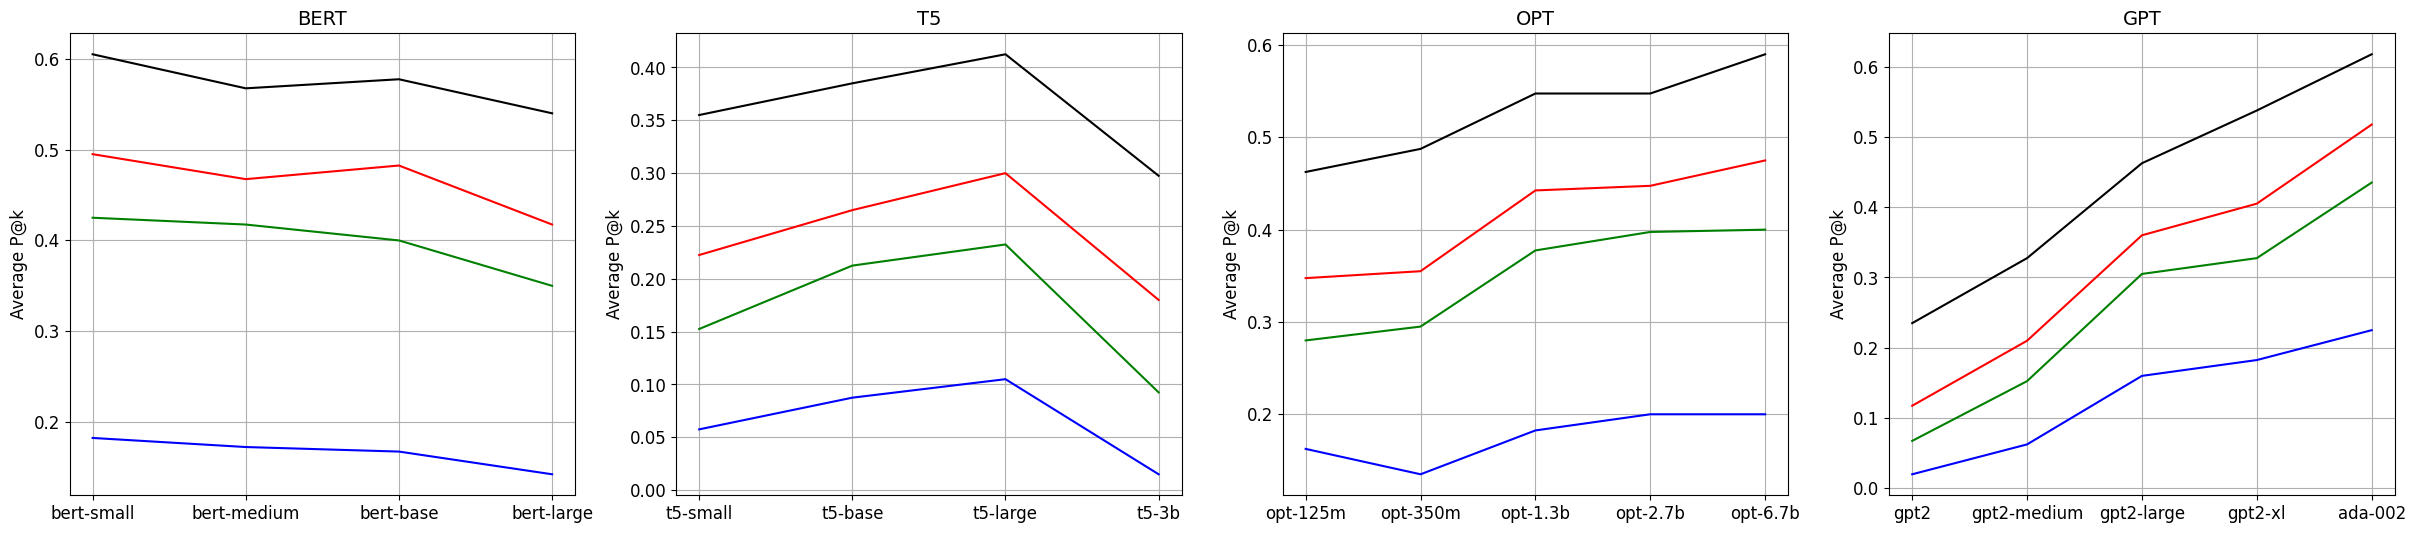

Data log_procrustes_complex_names.txt


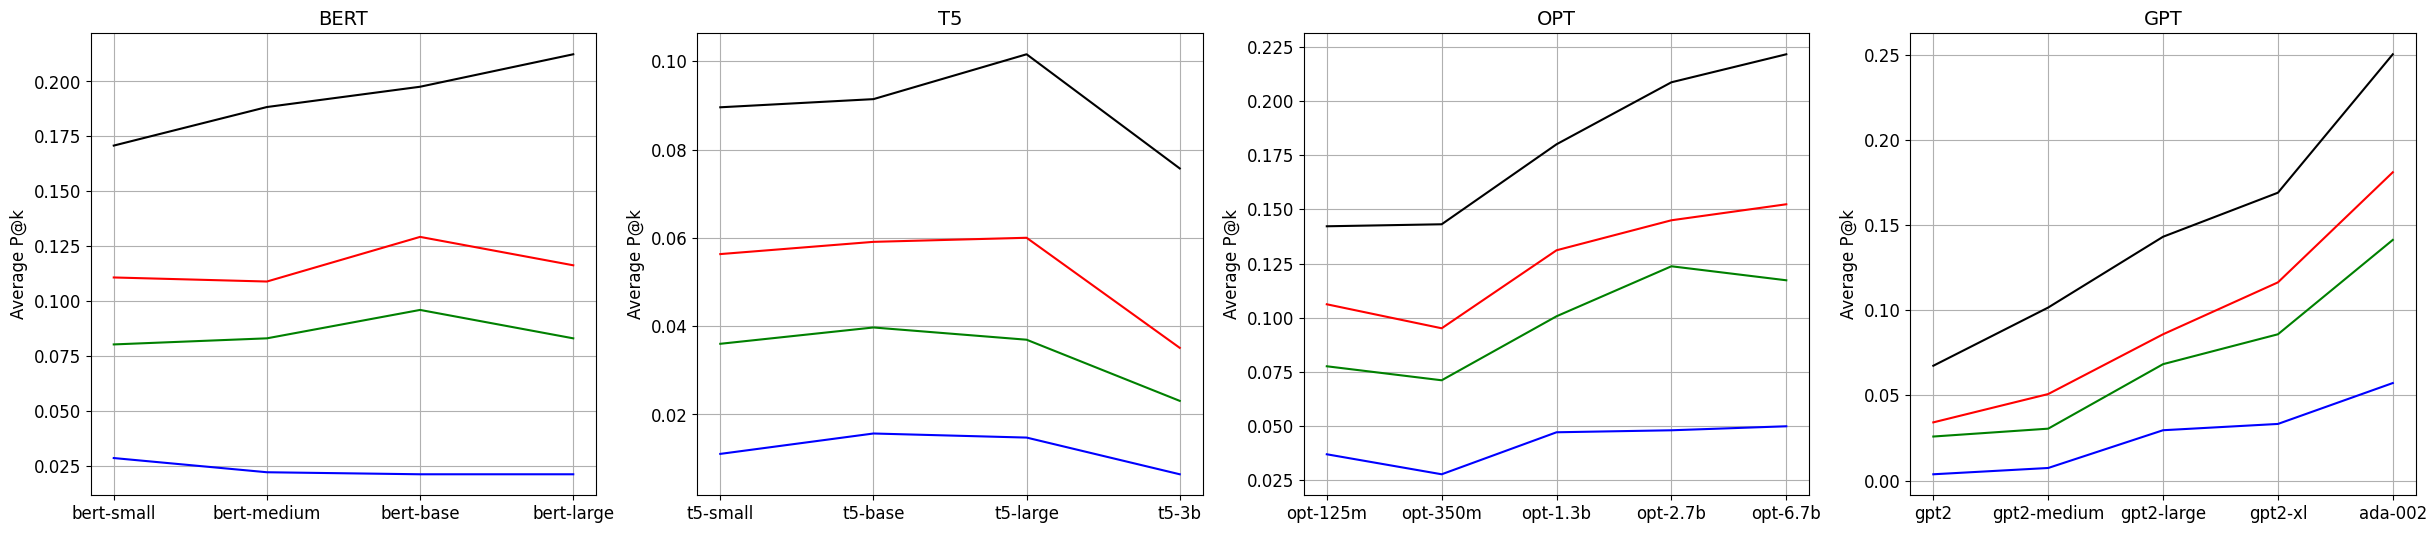

Data log_procrustes_complex_20K_2_to_3_synsets.txt


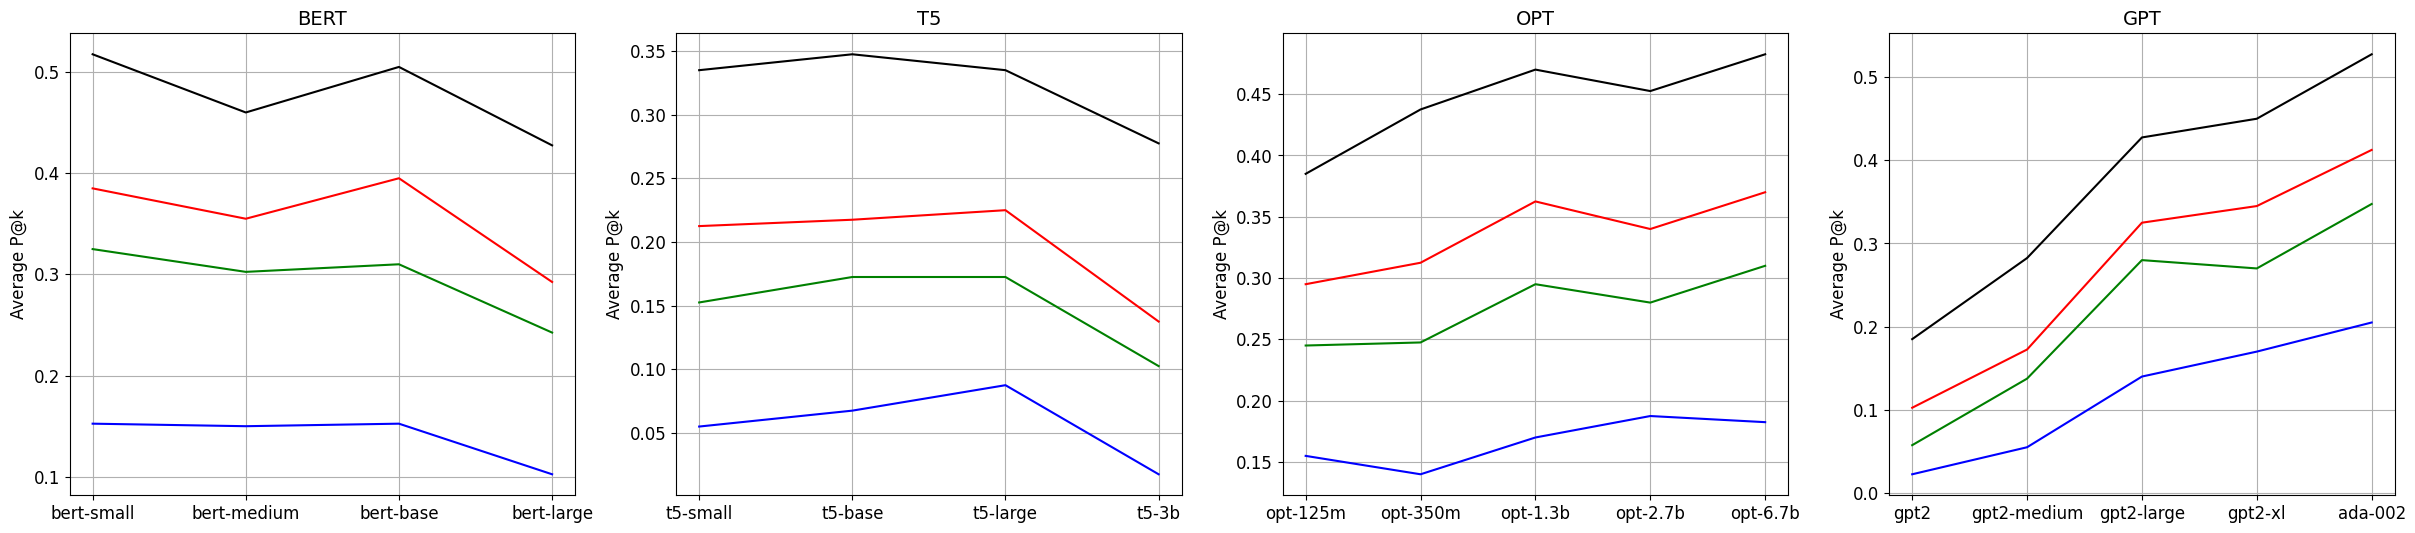

Data log_procrustes_complex_20K_4_to_infinity_synsets.txt


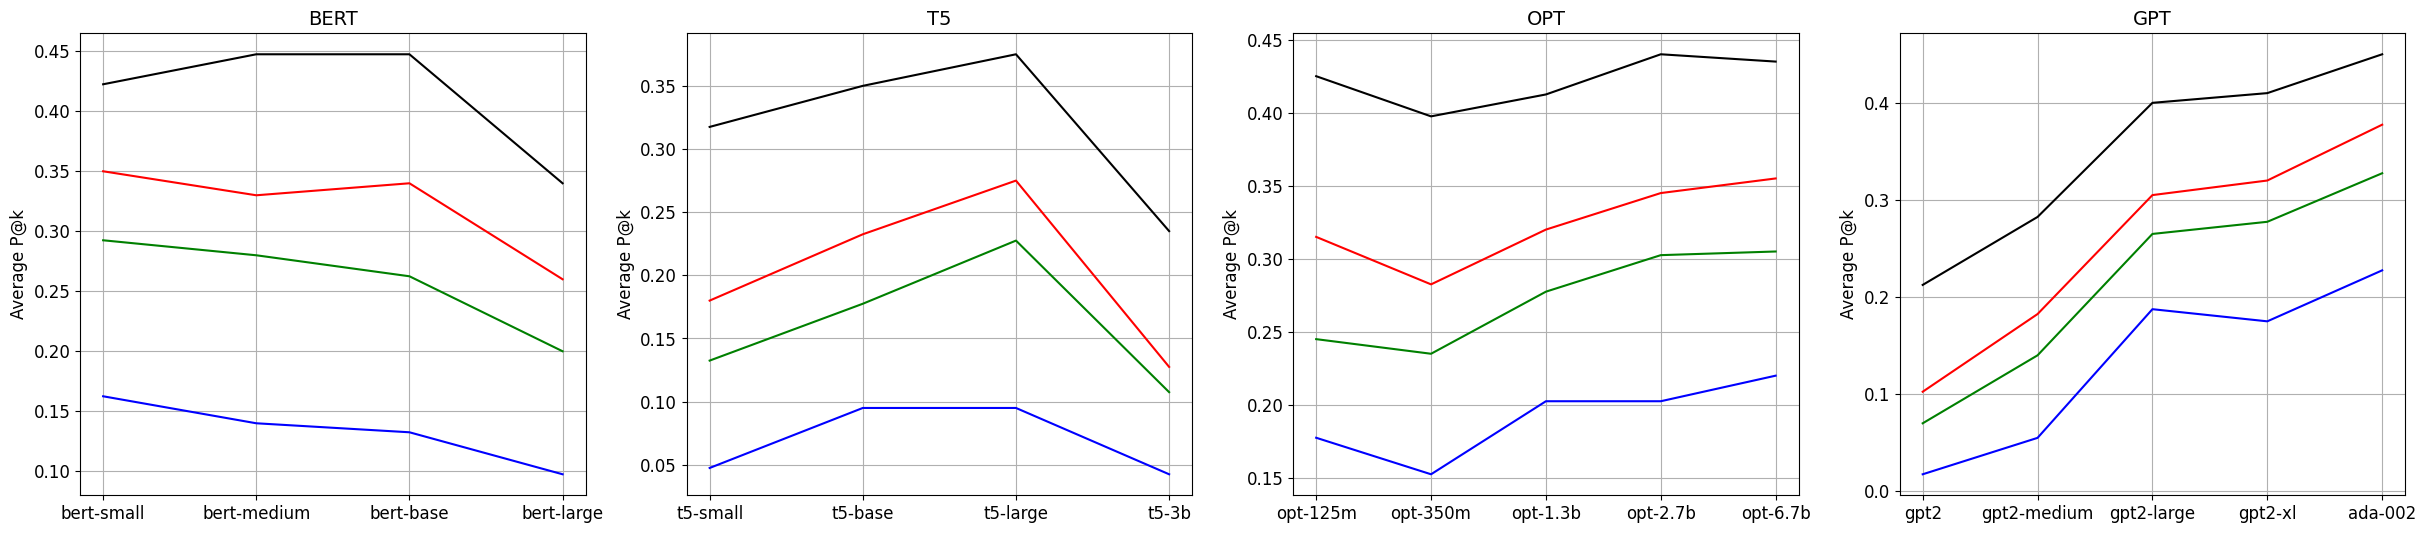

In [ ]:
def collector(filename, reference_space_type, data_type, model):
  return data_type == "Common english words" and "t5" not in model.lower()

collection = []

for filename in os.listdir(log_path):
  if "analogy" in filename:
    continue
  f = os.path.join(log_path, filename)
  print(f"Data {filename}")
  plot_file(f, collector=collector, collection=collection)

#3X3

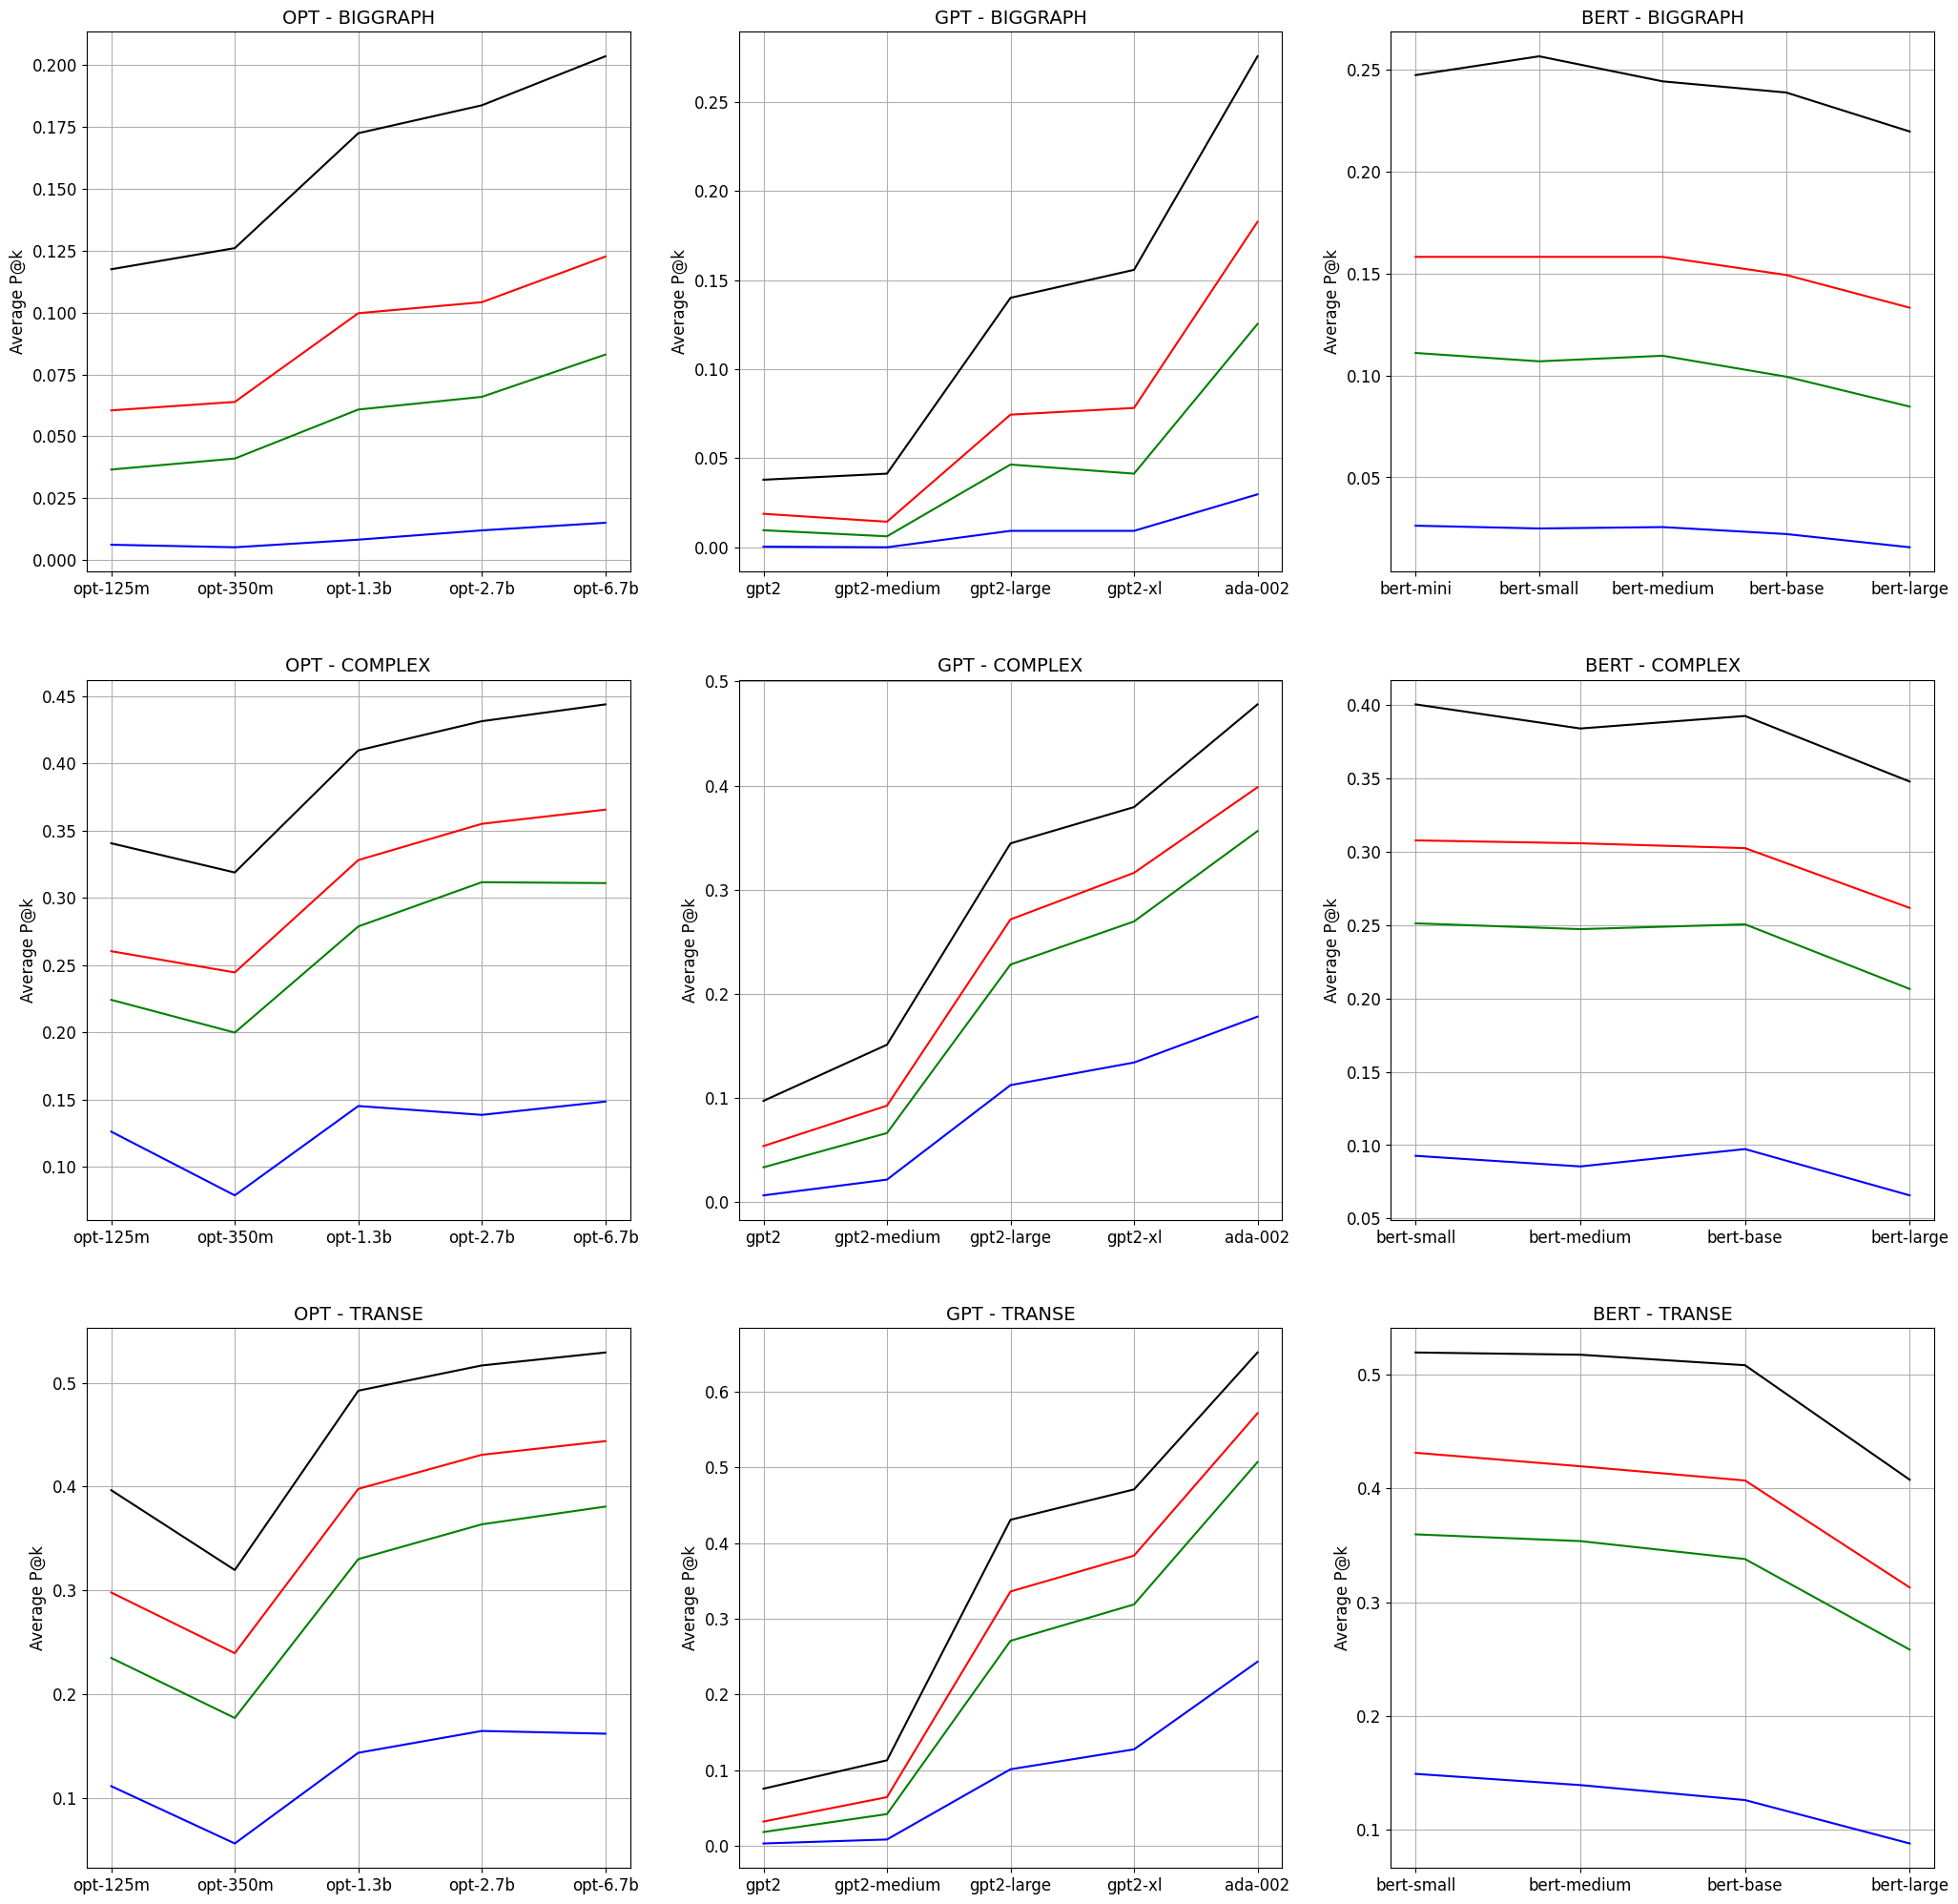

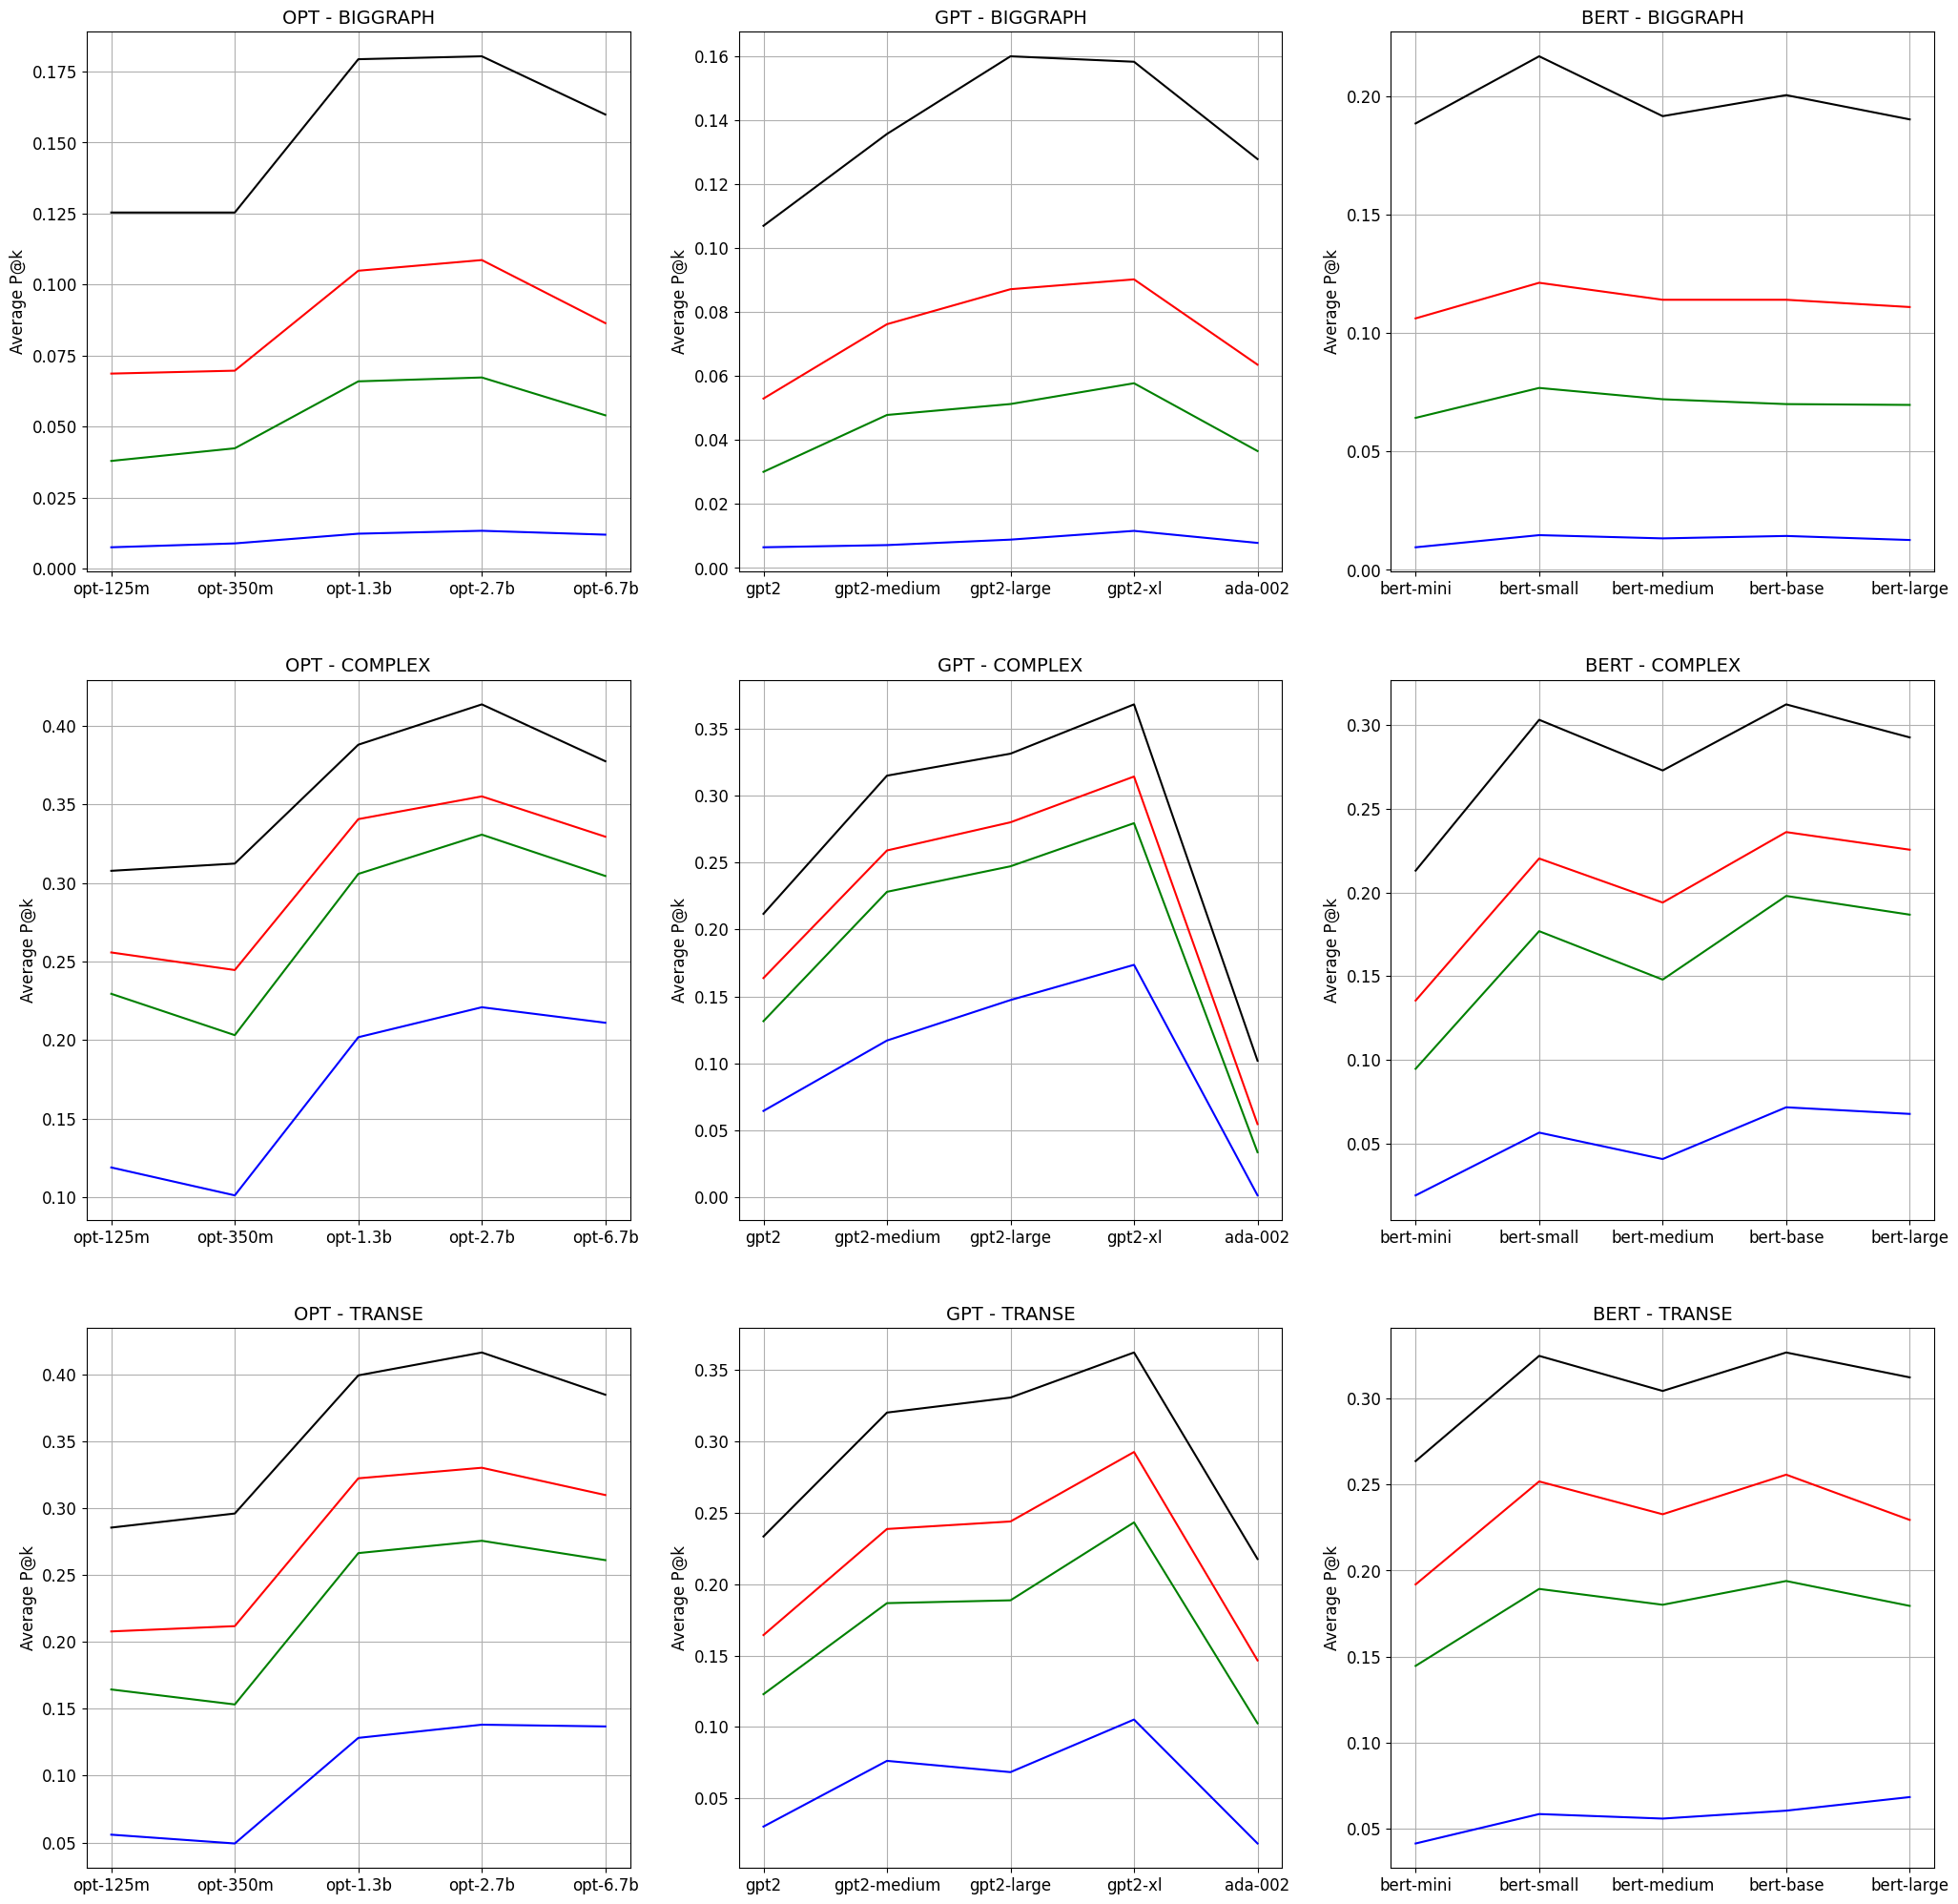

In [ ]:
experiments = ["Procrustes", "Ridge"]
Ks = [1, 10, 20, 50]
Models = ["OPT", "GPT", "BERT"]
Reference_spaces = ["Biggraph", "Complex", "TransE"]

row_mapping = {}
for row in collection:
  experiment, reference_space_type, data_type, model, k, r, color, title, models_plotted = row
  chosen_experiment = None
  chosen_K = None
  chosen_model = None
  chosen_reference_space = None

  for exp in experiments:
    if exp == experiment:
      chosen_experiment = exp
  for K in Ks:
    if K == k:
      chosen_K = K
  for mod in Models:
    if mod.lower() in model:
      chosen_model = mod
    elif "ada" in model:
      chosen_model = "GPT"
  for reference_space in Reference_spaces:
    if reference_space == reference_space_type:
      chosen_reference_space = reference_space
  assert(chosen_experiment is not None)
  assert(chosen_K is not None)
  assert(chosen_model is not None)
  assert(chosen_reference_space is not None)

  key = f"{chosen_experiment}-{chosen_K}-{chosen_model}-{chosen_reference_space}"
  row_mapping[key] = row

for experiment in experiments:
  fig, axs = plt.subplots(3, 3, figsize=(25,25))

  for ax in axs:
    for ax2 in ax:
      ax2.grid()
      ax2.set_ylabel("Average P@k")

  row_counter = 0
  col_counter = 0
  for reference_space in Reference_spaces:
    col_counter = 0
    for mod in Models:
      for K in Ks:
        key = f"{experiment}-{K}-{mod}-{reference_space}"
        experiment, reference_space_type, data_type, model, k, row, color, title, models_plotted = row_mapping[key]
        axs[row_counter][col_counter].plot(row, c=color, linestyle="solid")
      axs[row_counter][col_counter].set_xticks(np.arange(len(models_plotted)), models_plotted)
      axs[row_counter][col_counter].set_title(f"{title} - {reference_space_type.upper()}", fontsize = 14)
      col_counter += 1
      if col_counter == 3:
        col_counter = 0
    row_counter += 1

  image_filename = f"3x3_plot_{experiment}"
  plt.savefig(plot_path + image_filename)
  plt.show()

#Generating numbers

In [5]:
datas = {}
for filename in os.listdir(log_path):
  f = os.path.join(log_path, filename)
  if "analogy" in f:
    continue
  data = log_data(f)
  datas[filename.replace(".txt", "").replace("log_", "")] = data

ks = ["1","10","20","50"]

bert_models = ["bert-mini", "bert-small", "bert-medium", "bert-base", "bert-large"], "BERT"
t5_models = ["t5-small", "t5-base", "t5-large", "t5-3b"], "T5"
opt_models = ["opt-125m", "opt-350m", "opt-1.3b", "opt-2.7b", "opt-6.7b"], "OPT"
gpt_models = ['gpt2','gpt2-medium','gpt2-large', "gpt2-xl", "ada-002"], "GPT"
all_models = [bert_models, t5_models, opt_models, gpt_models]

In [6]:
rights = []
wrongs = []

tries = ["ridge_transe", "ridge_complex", "ridge_biggraph", "procrustes_transe", "procrustes_complex", "procrustes_biggraph"]

for f in datas:
  for k in ks:
    for model_type, name in all_models:
      heights = []
      for i in range(1, len(model_type)):
        if model_type[i-1] in datas[f] and model_type[i] in datas[f]:
          model1 = float(datas[f][model_type[i-1]][k]["test_PK_cosine"])
          model2 = float(datas[f][model_type[i]][k]["test_PK_cosine"])
          heights.append(model2-model1)
      if sum(heights) > 0:
        rights.append(f"{f}, {name}, {k}")
      else:
        wrongs.append(f"{f}, {name}, {k}")

print(f"RIGHTS: {len(rights)}")
#for r in rights:
#  print(r)

print("")
print(f"WRONGS: {len(wrongs)}")
#for w in wrongs:
#  print(w)

RIGHTS: 373

WRONGS: 203


Where is 1to1 better than all 2to3 and 2to3 better than all >4?

In [7]:
tries = ["ridge_transe", "ridge_complex", "ridge_biggraph", "procrustes_transe", "procrustes_complex", "procrustes_biggraph"]
for t in tries:
  exp1_data = datas[t+"_20K_1_to_1_synsets"]
  exp2_data = datas[t+"_20K_2_to_3_synsets"]
  exp3_data = datas[t+"_20K_4_to_infinity_synsets"]

  rights = 0
  counter = 0

  for model in exp1_data:
    for k in exp1_data[model]:
      if float(exp1_data[model][k]["test_PK_cosine"]) >= float(exp2_data[model][k]["test_PK_cosine"]) and float(exp2_data[model][k]["test_PK_cosine"]) >= float(exp3_data[model][k]["test_PK_cosine"]):
        rights += 1
      counter += 1
  print(f"{t}: {rights / counter}")

ridge_transe: 0.7261904761904762
ridge_complex: 0.36904761904761907
ridge_biggraph: 0.8809523809523809
procrustes_transe: 0.65
procrustes_complex: 0.5375
procrustes_biggraph: 0.8452380952380952


In [8]:
precisions = []
for f in datas:
  if "ridge" in f:
    for model in datas[f]:
      for k in datas[f][model]:
        precisions.append(float(datas[f][model][k]["test_PK_cosine"]))
print(sum(precisions)/len(precisions))

precisions = []
for f in datas:
  if "procrustes" in f:
    for model in datas[f]:
      for k in datas[f][model]:
        precisions.append(float(datas[f][model][k]["test_PK_cosine"]))
print(sum(precisions)/len(precisions))

0.16337800365718802
0.1892158489821242


In [9]:
precisions = []
for f in datas:
  if "biggraph" in f:
    for model in datas[f]:
      for k in datas[f][model]:
        precisions.append(float(datas[f][model][k]["test_PK_cosine"]))
print(sum(precisions)/len(precisions))

precisions = []
for f in datas:
  if "transe" in f:
    for model in datas[f]:
      for k in datas[f][model]:
        precisions.append(float(datas[f][model][k]["test_PK_cosine"]))
print(sum(precisions)/len(precisions))

precisions = []
for f in datas:
  if "complex" in f:
    for model in datas[f]:
      for k in datas[f][model]:
        precisions.append(float(datas[f][model][k]["test_PK_cosine"]))
print(sum(precisions)/len(precisions))

0.1285109748144495
0.2132474652108254
0.18766765859662657


#Fitting linear lines

In [10]:
linear_lines = {}
n_experiments = 0
for filename in os.listdir(log_path):
  f = os.path.join(log_path, filename)
  if "analogy" in f:
    continue
  data = log_data(f)
  key1 = filename.replace(".txt", "").replace("log_", "")
  linear_lines[key1] = {}
  for type_models, type_name in all_models:
    linear_lines[key1][type_name] = {}
    for k in ks:
      y = []
      n_experiments += 1
      for model in type_models:
        if model in datas[key1]:
          y.append(float(datas[key1][model][k]["test_PK_cosine"]))
      x = [i for i in range(1, len(y)+1)]
      m, b, r, _, _ = linregress(x,y)
      linear_lines[key1][type_name][k] = {
          "m": m,
          "b": b,
          "r^2": r**2
      }
linear_lines_reg_keys = list(filter(lambda key: "synsets" not in key and "places" not in key and "names" not in key, linear_lines.keys()))
#print(linear_lines_reg_keys)
#print(linear_lines.keys())
print(len(linear_lines_reg_keys))
print(n_experiments)

6
576


In [11]:
rsquared_thresholds = [0.01, 0.1, 0.5, 0.75, 0.9]
for rsquared_threshold in rsquared_thresholds:
  counter = 0
  positives = 0
  ms = []
  for f in linear_lines:
    for model in linear_lines[f]:
      for k in linear_lines[f][model]:
        if linear_lines[f][model][k]["r^2"] > rsquared_threshold:
          if linear_lines[f][model][k]["m"] > 0:
            positives += 1
          ms.append(linear_lines[f][model][k]["m"])
          counter += 1
  print(rsquared_threshold)
  print(max(ms), statistics.stdev(ms))
  print(counter, positives / counter)
  print("")

0.01
0.17200000000000001 0.03218643869438033
525 0.6895238095238095

0.1
0.17200000000000001 0.03429376735942833
433 0.7551963048498845

0.5
0.17200000000000001 0.03681834098114665
297 0.8619528619528619

0.75
0.17200000000000001 0.03940066304462986
205 0.9219512195121952

0.9
0.17200000000000001 0.045021962135201175
98 0.9591836734693877



In [17]:
def generate_stats(name):
  precisions = []
  counter = 0
  positives = 0
  for f in linear_lines_reg_keys:
    if name in f:
      for model in linear_lines[f]:
        for k in linear_lines[f][model]:
          if linear_lines[f][model][k]["m"] > 0:
            positives += 1
          precisions.append(linear_lines[f][model][k]["m"])
          counter += 1
  if len(precisions) > 0:
    print(name.upper())
    print("Percent positive slope: ", round(positives/counter, 3))
    print("Max slope: ", round(max(precisions), 3))
    print("SD: ", round(statistics.stdev(precisions), 3), "\n")

print("######################\nREFERENCE VECTOR SPACE\n######################\n")
generate_stats("biggraph")
generate_stats("transe")
generate_stats("complex")
print("#################\nPROJECTION METHOD\n#################\n")
generate_stats("procrustes")
generate_stats("ridge")

######################
REFERENCE VECTOR SPACE
######################

BIGGRAPH
Percent positive slope:  0.719
Max slope:  0.059
SD:  0.014 

TRANSE
Percent positive slope:  0.75
Max slope:  0.151
SD:  0.045 

COMPLEX
Percent positive slope:  0.656
Max slope:  0.099
SD:  0.03 

#################
PROJECTION METHOD
#################

PROCRUSTES
Percent positive slope:  0.521
Max slope:  0.151
SD:  0.044 

RIDGE
Percent positive slope:  0.896
Max slope:  0.032
SD:  0.012 



In [18]:
def generate_stats(model):
  precisions = []
  counter = 0
  positives = 0
  for f in linear_lines_reg_keys:
    if model in linear_lines[f]:
        for k in linear_lines[f][model]:
          if linear_lines[f][model][k]["m"] > 0:
            positives += 1
          precisions.append(linear_lines[f][model][k]["m"])
          counter += 1
  if len(precisions) > 0:
    print(model.upper())
    print("Percent positive slope: ", round(positives/counter, 3))
    print("Max slope: ", round(max(precisions), 3))
    print("SD: ", round(statistics.stdev(precisions), 3), "\n")

print("###############\nLANGUAGE MODELS\n###############\n")
generate_stats("GPT")
generate_stats("OPT")
generate_stats("BERT")
generate_stats("T5")

###############
LANGUAGE MODELS
###############

24
GPT
Percent positive slope:  0.833
Max slope:  0.151
SD:  0.052 

24
OPT
Percent positive slope:  1.0
Max slope:  0.048
SD:  0.013 

24
BERT
Percent positive slope:  0.458
Max slope:  0.021
SD:  0.016 

24
T5
Percent positive slope:  0.542
Max slope:  0.017
SD:  0.007 



In [ ]:
def generate_stats(k):
  precisions = []
  counter = 0
  positives = 0
  for f in linear_lines_reg_keys:
    for model in linear_lines[f]:
          if linear_lines[f][model][k]['m'] > 0:
            positives += 1
          precisions.append(linear_lines[f][model][k]['m'])
          counter += 1
  if len(precisions) > 0:
    print(f"k={k}".upper())
    print("Percent positive slope: ", round(positives/counter, 3))
    print("Max slope: ", round(max(precisions), 3))
    print("SD: ", round(statistics.stdev(precisions), 3), "\n")

print("############\nIMPACT OF K\n############\n")
generate_stats('1')
generate_stats('10')
generate_stats('20')
generate_stats('50')

############
IMPACT OF K
############

K=1
Percent positive slope:  0.75
Max slope:  0.06
SD:  0.017 

K=10
Percent positive slope:  0.708
Max slope:  0.125
SD:  0.033 

K=20
Percent positive slope:  0.708
Max slope:  0.14
SD:  0.037 

K=50
Percent positive slope:  0.667
Max slope:  0.151
SD:  0.04 



In [20]:
def generate_stats_error_analysis(name):
  precisions = []
  counter = 0
  positives = 0
  for f in linear_lines:
    if name in f:
      for model in linear_lines[f]:
        for k in linear_lines[f][model]:
          if linear_lines[f][model][k]["m"] > 0:
            positives += 1
          precisions.append(linear_lines[f][model][k]["m"])
          counter += 1
  if len(precisions) > 0:
    print(len(precisions))
    print(name)
    print("Percent positive slope: ", round(positives/counter, 3))
    print("Max slope: ", round(max(precisions), 3))
    print("SD: ", round(statistics.stdev(precisions), 3), "\n")

print("############\nWORD CLASSES\n############\n")
generate_stats_error_analysis("names")
generate_stats_error_analysis("places")

precisions = []
counter = 0
positives = 0
for f in linear_lines:
  if f[-3:] == "20K":
    for model in linear_lines[f]:
      for k in linear_lines[f][model]:
        if linear_lines[f][model][k]["m"] > 0:
            positives += 1
        precisions.append(linear_lines[f][model][k]["m"])
        counter += 1
if len(precisions) > 0:
    print(len(precisions))
    print("20K")
    print("Percent positive slope: ", round(positives/counter, 3))
    print("Max slope: ", round(max(precisions), 3))
    print("SD: ", round(statistics.stdev(precisions), 3), "\n")

############
WORD CLASSES
############

96
names
Percent positive slope:  0.76
Max slope:  0.061
SD:  0.014 

96
places
Percent positive slope:  0.958
Max slope:  0.105
SD:  0.021 

96
20K
Percent positive slope:  0.708
Max slope:  0.151
SD:  0.032 



In [ ]:
tries = ["ridge_transe", "ridge_complex", "ridge_biggraph", "procrustes_transe", "procrustes_complex", "procrustes_biggraph"]
synsets = ["_20K_1_to_1_synsets", "_20K_2_to_3_synsets", "_20K_4_to_infinity_synsets"]

print("########\nPOLYSEMY\n########\n")

for synset in synsets:
  precisions = []
  positives = 0
  counter = 0
  for t in tries:
    data = linear_lines[t+synset]
    for model in data:
      for k in data[model]:
        if data[model][k]["m"] > 0:
          positives += 1
        precisions.append(data[model][k]["m"])
        counter += 1

  if len(precisions) > 0:
      print(synset[5:11])
      print("Percent positive slope: ", round(positives/counter, 3))
      print("Max slope: ", round(max(precisions), 3))
      print("SD: ", round(statistics.stdev(precisions), 3), "\n")

########
POLYSEMY
########

1_to_1
Percent positive slope:  0.562
Max slope:  0.172
SD:  0.041 

2_to_3
Percent positive slope:  0.573
Max slope:  0.145
SD:  0.036 

4_to_i
Percent positive slope:  0.5
Max slope:  0.129
SD:  0.032 



In [ ]:
tries = ["ridge_transe", "ridge_complex", "ridge_biggraph", "procrustes_transe", "procrustes_complex", "procrustes_biggraph"]
for t in tries:
  exp1_data = linear_lines[t+"_20K_1_to_1_synsets"]
  exp2_data = linear_lines[t+"_20K_2_to_3_synsets"]
  exp3_data = linear_lines[t+"_20K_4_to_infinity_synsets"]

  rights = 0
  counter = 0
  rights2 = 0

  for model in exp1_data:
    for k in exp1_data[model]:
      if exp1_data[model][k]["m"] >= exp2_data[model][k]["m"]:
        rights += 1
      if exp2_data[model][k]["m"] >= exp3_data[model][k]["m"]:
        rights2 += 1
      counter += 1
  if counter != 0:
    print(f"{t}: {rights / counter}, {counter}")
    print(f"{t}: {rights2 / counter}, {counter}")

ridge_transe: 0.875, 16
ridge_transe: 0.625, 16
ridge_complex: 0.75, 16
ridge_complex: 0.3125, 16
ridge_biggraph: 0.25, 16
ridge_biggraph: 0.625, 16
procrustes_transe: 0.8125, 16
procrustes_transe: 0.6875, 16
procrustes_complex: 0.8125, 16
procrustes_complex: 0.625, 16
procrustes_biggraph: 0.5, 16
procrustes_biggraph: 0.5625, 16


#generate table

In [ ]:

k = 50
d = {}
rows = list(linear_lines.keys())
for _, name in all_models:
  d[name] = []
  for row in rows:
    s = linear_lines[row][name][str(k)]
    s = f"m: {round(s['m'], 4)}, r^2: {round(s['r^2'], 2)}"
    d[name].append(s)
df = pd.DataFrame(data=d, index=[label.replace("_2_to_3_synsets", "2-3 s").replace("_1_to_1_synsets", "1-1 s").replace("_4_to_infinity_synsets", ">4 s") for label in rows])
latex = df.to_latex()
print(latex)

\begin{tabular}{lllll}
\toprule
{} &                   BERT &                     T5 &                   OPT &                    GPT \\
\midrule
ridge\_transe\_names           &   m: 0.0077, r\textasciicircum 2: 0.76 &   m: 0.0056, r\textasciicircum 2: 0.46 &   m: 0.0039, r\textasciicircum 2: 0.4 &  m: -0.0015, r\textasciicircum 2: 0.05 \\
ridge\_transe\_20K             &   m: 0.0099, r\textasciicircum 2: 0.38 &   m: 0.0053, r\textasciicircum 2: 0.03 &  m: 0.0319, r\textasciicircum 2: 0.68 &    m: 0.0011, r\textasciicircum 2: 0.0 \\
ridge\_biggraph\_20K           &  m: -0.0013, r\textasciicircum 2: 0.03 &   m: 0.0051, r\textasciicircum 2: 0.19 &  m: 0.0124, r\textasciicircum 2: 0.51 &   m: 0.0064, r\textasciicircum 2: 0.21 \\
ridge\_complex\_names          &   m: 0.0092, r\textasciicircum 2: 0.78 &    m: 0.003, r\textasciicircum 2: 0.23 &   m: 0.0114, r\textasciicircum 2: 0.8 &  m: -0.0027, r\textasciicircum 2: 0.03 \\
ridge\_biggraph\_places        &    m: 0.034, r\textasciicircum 2:

<ipython-input-118-d6fc833508ab>:11: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex = df.to_latex()
